In [1]:
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.io import fits
import healpy as hp
import matplotlib.pyplot as plt
import time
import sys
from pixell import enmap, enplot, reproject, utils, curvedsky, wcsutils
from matplotlib import cm
from scipy.optimize import curve_fit
from scipy.linalg import sqrtm
from tqdm import tqdm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import pandas as pd
from matplotlib import font_manager

---

# Real

## ACT

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f090_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks90 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks90.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f150_daynight_map.fits")
windowlen = 5
map_pix = actmap

awd = pd.read_csv('data/ard_not_adv.csv', skiprows = 0)
zs = [0, 100]
rhs = [0, 100000]

stacks150 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks150.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f220_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks220 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks220.append(stack_CMB_kSZ[0])

## Planck

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks100 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks100.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks143 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks143.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks217 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks217.append(stack_CMB_kSZ[0])

In [ ]:
awd

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/wh22.csv', skiprows = 0)
zs = [1, 100]
rhs = [0, 100000]

stacks353 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k]) & (awd.m>0)]['ra'].reset_index(drop=True)
                decs = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k]) & (awd.m>0)]['dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['ra'].reset_index(drop=True)
                decs = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['ra'].reset_index(drop=True)
            decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['ra'].reset_index(drop=True)
            decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks353.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_545-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/ard_not_adv.csv', skiprows = 0)
zs = [0, 100]
rhs = [0, 100000]

stacks545 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks545.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_857-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/wh22.csv', skiprows = 0)
awd = awd[awd.z>=1]
zs = [1, 100]
rhs = [0, 100000]

stacks857 = []
lens = []
riches = []
reds = []
# for j in range(len(zs)):
#     for k in range(len(rhs)):
stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
#         riches.append(rhs[k])
#         reds.append(zs[j])
#         if j == len(zs)-1:
#             if k == len(rhs)-1:
#                 print(zs[j],0)
#                 print(rhs[k],0)
#                 ras = awd['ra'].reset_index(drop=True)
#                 decs = awd['dec'].reset_index(drop=True)
#             else:
#                 print(zs[j],0)
#                 print(rhs[k+1],rhs[k])
#                 ras = awd['ra'].reset_index(drop=True)
#                 decs = awd['dec'].reset_index(drop=True)
#         elif k == len(rhs)-1:
#             print(zs[j+1],zs[j])
#             print(rhs[k],0)
#             ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['ra'].reset_index(drop=True)
#             decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['dec'].reset_index(drop=True)
#         else:
#             print(zs[j+1],zs[j])
#             print(rhs[k+1],rhs[k])
#             ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['ra'].reset_index(drop=True)
#             decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['dec'].reset_index(drop=True)

ras = awd['ra'].reset_index(drop=True)
decs = awd['dec'].reset_index(drop=True)

N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks857.append(stack_CMB_kSZ[0])

In [2]:
ros = hp.read_map("data/rass_healpix_countsec.fits")
mask = hp.read_map("data/mask_comprass.fits")
ros[ros<-1e23]=0
masked_ros = []
for i in tqdm(range(len(mask))):
    masked_ros.append(0)
    if mask[i]:
        masked_ros[i]=ros[i]
masked_ros = np.array(masked_ros)
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(masked_ros,shape=shape,wcs=wcs)

awd = pd.read_csv('data/ard_not_adv.csv', skiprows = 0)
zs = [0, 100]
rhs = [0, 100000]

stacksros = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacksros.append(stack_CMB_kSZ[0])

100%|█████████████████████████████████████████████████| 201326592/201326592 [00:44<00:00, 4484705.79it/s]


Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting
100 0
100000 0


100%|█████████████████████████████████████████████████████████████| 21538/21538 [01:32<00:00, 234.03it/s]


100 0
100000 0


100%|█████████████████████████████████████████████████████████████| 21538/21538 [01:31<00:00, 236.64it/s]


100 0
100000 0


100%|█████████████████████████████████████████████████████████████| 21538/21538 [01:29<00:00, 240.39it/s]


100 0
100000 0


100%|█████████████████████████████████████████████████████████████| 21538/21538 [01:30<00:00, 237.80it/s]


---

---

---

---

# Non-clusters

## ACT

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f090_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks90 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks90.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f150_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks150 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks150.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f220_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks220 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks220.append(stack_CMB_kSZ[0])

## Planck

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks100 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks100.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks143 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks143.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks217 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks217.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks353 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks353.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_545-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks545 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks545.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_857-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks857 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks857.append(stack_CMB_kSZ[0])

In [ ]:
ros = hp.read_map("data/rass_healpix_countsec.fits")
mask = hp.read_map("data/mask_comprass.fits")
ros[ros<-1e23]=0
masked_ros = []
for i in tqdm(range(len(mask))):
    masked_ros.append(0)
    if mask[i]:
        masked_ros[i]=ros[i]
masked_ros = np.array(masked_ros)
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(masked_ros,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacksros = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacksros.append(stack_CMB_kSZ[0])

---

---

---

---

# Real

In [ ]:
font_path = 'data/cmunrm.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(nrows=3, ncols=3,figsize=(15,15))
i = 0

for j,row in enumerate(ax):
    for k, col in enumerate(row):
        f1 = col.imshow(stacks220[i])
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        plt.colorbar(mappable = f1, ax = col,orientation='horizontal',fraction=0.047, pad=0.02)
        scalebar = AnchoredSizeBar(ax[0][0].transData,
                                   4.4, '', 'center left', 
                                   pad=0.,
                                   sep=-7,
                                   color='white',
                                   frameon=False,
                                   size_vertical=0.02)
        ax[0][0].add_artist(scalebar)
        ax[0][0].text(0.1, 0.4, 'R = 10$\,$\''.format(10), c='white', fontsize=18, transform=ax[0][0].transAxes)

        col.text(0.3,0.5,"N={}".format(lens[i]),color='red')
        if j==0 and k==0:
            col.text(-5,4.2,"z<0.32",size=20)
        if j==1 and k==0:
            col.text(-5,4.2,"z>0.32",size=20)
        if j==2 and k==0:
            col.text(-5,4.2,"All z",size=20)
        if k==0 and j==0:
            col.text(3,-3,"rh<27",size=20)
        if k==1 and j==0:
            col.text(3,-3,"rh>27",size=20)
        if k==2 and j==0:
            col.text(3,-3,"All rh",size=20)

        i+=1

plt.savefig("output/stacks220_zoom.png")
plt.show()

---

# Non-clusters

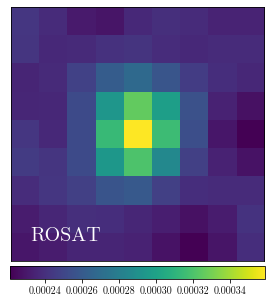

In [3]:
font_path = 'data/cmunrm.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(figsize=(5,5))
i = 0

f1 = ax.imshow(stacksros[i])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.colorbar(mappable = f1, ax = ax,orientation='horizontal',fraction=0.047, pad=0.02)
scalebar = AnchoredSizeBar(ax.transData,
                           4.4, '', 'center left', 
                           pad=0.,
                           sep=-7,
                           color='white',
                           frameon=False,
                           size_vertical=0.02)
# ax.add_artist(scalebar)
# ax.text(0.1, 0.4, 'R = 10$\,$\''.format(10), c='white', fontsize=18, transform=ax.transAxes)

# ax.text(0.2,.7,"N={}".format(lens[i]),color='white',fontsize=20)
ax.text(0.2,7.8,"ROSAT".format(lens[i]),color='white',fontsize=20)

i+=1

plt.savefig("output/stacksros.png")
plt.show()

## NEW Work ##

In [3]:
# Copied imports from above

import numpy as np
from astropy.coordinates import SkyCoord
from astropy.io import fits
import healpy as hp
import matplotlib.pyplot as plt
import time
import sys
from pixell import enmap, enplot, reproject, utils, curvedsky, wcsutils
from matplotlib import cm
from scipy.optimize import curve_fit
from scipy.linalg import sqrtm
from tqdm import tqdm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import pandas as pd
from matplotlib import font_manager

In [4]:

# Task 2 - Map of sky in a certain area

# TO get void locations
# awd = pd.read_csv("data/voids.csv", skiprows = 0).rename(columns = {"ras":"amf_ra", "decs":"amf_dec"})

# TO get ALL cluster locations (union3)
awd = pd.read_csv("data/union3.csv", skiprows = 0)

In [11]:
# Categories
# 0 - AMF
# 1 - Zou subset DES
# 2 - Zou subset DESI
# 3 - Zou subset HSC
# 4 - WH22

# 1)  z > 1, Zou HSC
awd[(awd.z > 1) & (awd.cat == 3)]

,amf_ra,amf_dec,z,rh,cat
666252,214.233624,52.908531,1.171777,97.716247,3
666254,214.095757,52.893964,1.307441,248.589667,3
666255,214.132952,52.864502,1.269002,276.290641,3
666257,213.663365,52.436018,1.254209,54.170192,3
666263,214.014074,52.883529,1.118046,152.687710,3
...,...,...,...,...,...
702805,34.565933,-6.762572,1.297047,36.624157,3
702809,37.065236,-6.845158,1.207268,67.606171,3
702810,37.437386,-6.753232,1.263489,111.781215,3
702814,37.505307,-6.801662,1.233534,103.779296,3


In [12]:
# 2)  z > 1, WH22

awd[(awd.z > 1) & (awd.cat == 4)]

,amf_ra,amf_dec,z,rh,cat
702831,0.02301,-46.45272,1.0846,25.76,4
702844,0.03382,-6.25099,1.1777,35.29,4
702848,0.03710,-1.63800,1.2057,38.65,4
702860,0.04763,-1.52811,1.3026,25.43,4
702861,0.04946,-39.56741,1.4783,36.51,4
...,...,...,...,...,...
854049,359.98184,1.06644,1.0354,23.50,4
854051,359.98358,-41.48384,1.0323,32.38,4
854053,359.98404,-37.08991,1.2443,22.22,4
854056,359.98685,-65.80522,1.1063,26.87,4


In [13]:
# 3)  0.6 < z < 1, Zou DESI

awd[(awd.z < 1) & (awd.z > 0.6) & (awd.cat == 2)]

,amf_ra,amf_dec,z,rh,cat
133442,135.576658,84.282097,0.672224,71.125599,2
133446,159.441977,84.470371,0.774722,131.296879,2
133448,169.336282,84.745055,0.739466,186.789902,2
133449,170.173343,84.497271,0.739765,123.796251,2
133456,209.629132,84.575575,0.714163,61.195763,2
...,...,...,...,...,...
666229,65.460255,-66.866127,0.772272,90.605660,2
666230,65.332630,-66.820162,0.742248,75.869274,2
666231,66.479394,-67.250996,0.704453,94.599666,2
666232,67.524140,-66.458386,0.674120,69.780400,2


In [18]:
# 4)  0.6 < z < 1, Zou DES + WH22 
# DES alone doesn't have enough

awd[(awd.z < 1) & (awd.z > 0.6) & (awd.cat.isin([1, 4]))]

,amf_ra,amf_dec,z,rh,cat
46483,1.714827,5.312761,0.673002,172.958085,1
46486,2.441726,5.300196,0.643053,100.524973,1
46489,2.728994,4.852877,0.833884,118.069723,1
46491,2.862339,4.905198,0.907960,122.423790,1
46492,4.327177,5.021294,0.831561,87.429972,1
...,...,...,...,...,...
854050,359.982450,-64.504380,0.998200,22.580000,4
854055,359.986360,-60.219320,0.786200,23.000000,4
854058,359.990910,-44.662090,0.768400,16.340000,4
854059,359.993770,-49.098890,0.670800,21.850000,4


In [19]:
# 5)  0.05 < z < 0.6, AMF + WH22

awd[(awd.z < 0.6) & (awd.z > 0.05) & (awd.cat.isin([0, 4]))]

,amf_ra,amf_dec,z,rh,cat
0,23.91280,20.74650,0.0601,219.3663,0
1,260.63240,32.13980,0.2252,200.7117,0
2,197.87960,-1.33560,0.2042,192.0829,0
3,250.14850,46.69170,0.2248,182.3373,0
4,346.34020,21.03780,0.1453,182.2769,0
...,...,...,...,...,...
854041,359.97733,-40.94089,0.4739,42.2200,4
854046,359.98016,-41.45370,0.3851,15.6900,4
854048,359.98105,2.55604,0.5931,31.0700,4
854052,359.98361,-41.57015,0.4967,23.9100,4


In [22]:
# 6)  0.05 < z < 0.6, Zou DESI

awd[(awd.z < 0.6) & (awd.z > 0.05) & (awd.cat == 2)]

,amf_ra,amf_dec,z,rh,cat
133443,134.650172,84.499087,0.413532,30.532043,2
133444,158.361191,84.663566,0.270745,80.835722,2
133445,158.191359,84.564860,0.428045,49.797034,2
133447,157.118468,84.612546,0.464584,115.619590,2
133450,195.720907,84.722155,0.155282,44.510254,2
...,...,...,...,...,...
666247,61.088736,-67.972281,0.440988,53.872143,2
666248,61.212453,-67.932890,0.462506,127.688333,2
666249,61.344614,-67.881257,0.419552,101.967931,2
666250,61.468347,-67.935127,0.480716,39.670418,2


In [42]:
# Vertical
ver = (((90*60)/10)*(5/6))-1
ver

449.0

In [43]:
# Horiztonal
hor = (180*60)/10-1
hor

1079.0

In [44]:
ver * hor

484471.0

In [47]:
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy import units as u
from tqdm import tqdm

# galactic coordinates
glon = []
glat = []
for lon in tqdm(np.linspace(180,360,1079)):
    for lat in np.linspace(15,90,449):
        if (lat >= -15) & (lat <= 15):
            continue
        glon.append(lon)
        glat.append(lat)
glon2 = [i*u.degree for i in glon]
glat2 = [i*u.degree for i in glat]

# convert to equitorial coordinates
c = SkyCoord(glon2, glat2, frame='galactic')
ras = c.icrs.ra.deg
decs = c.icrs.dec.deg

100%|█████████████████████████████████████████████████████████████████████████████| 1079/1079 [00:00<00:00, 4073.03it/s]


## Planck Plotting - All Freq. ##

In [6]:
# For the 100 GHz frequency sample

pl100 = hp.read_map("data/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits")
pl143 = hp.read_map("data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits")
pl217 = hp.read_map("data/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits")
pl353 = hp.read_map("data/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits")
pl545 = hp.read_map("data/HFI_SkyMap_545-field-Int_2048_R3.00_full.fits")
pl857 = hp.read_map("data/HFI_SkyMap_857-field-Int_2048_R3.00_full.fits")

windowlen = 10
pl100[pl100<-1e23]=0
pl143[pl143<-1e23]=0
pl217[pl217<-1e23]=0
pl353[pl353<-1e23]=0
pl545[pl545<-1e23]=0
pl857[pl857<-1e23]=0

# Create a full sky Cartesian geometry with resolution 5 arcmin / pixel
# Returns a shape and a world coordinate system?
shape, wcs = enmap.fullsky_geometry(res = 5.0*utils.arcmin, proj = "car")
map_pix = list()
map_pix.append(reproject.enmap_from_healpix(pl100, shape = shape, wcs = wcs))
map_pix.append(reproject.enmap_from_healpix(pl143, shape = shape, wcs = wcs))
map_pix.append(reproject.enmap_from_healpix(pl217, shape = shape, wcs = wcs))
map_pix.append(reproject.enmap_from_healpix(pl353, shape = shape, wcs = wcs))
map_pix.append(reproject.enmap_from_healpix(pl545, shape = shape, wcs = wcs))
map_pix.append(reproject.enmap_from_healpix(pl857, shape = shape, wcs = wcs))

Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting


KeyboardInterrupt: 

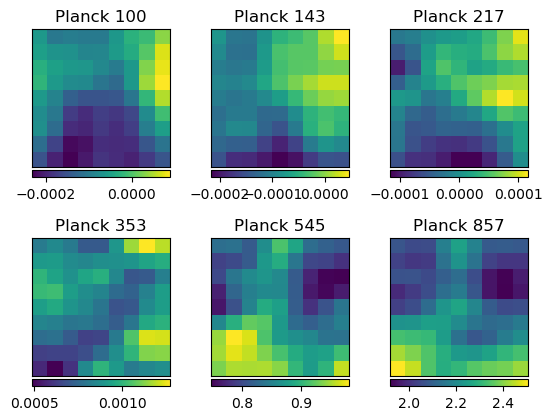

In [17]:
# Plotting Planck Images at all Planck Frequencies around an RA and DEC

ra = 23.91280
dec = 20.74650
windowlen = 10
planck_map_freq = [100, 143, 217, 353, 545, 857]

fig, ax = plt.subplots(2, 3)
j = 0
for i in range(len(map_pix)):
    a = i
    stamp = reproject.thumbnails(map_pix[i], coords = np.deg2rad([dec, ra]), r = windowlen*utils.arcmin)
    if i >= 3:
        a -= 3
        j = 1
    f1 = ax[j,a].imshow(stamp[0]) 
    ax[j,a].get_xaxis().set_visible(False)
    ax[j,a].get_yaxis().set_visible(False)
    ax[j,a].set_title("Planck " + str(map_freq[i]))
    plt.colorbar(mappable = f1, ax = ax[j,a], orientation = "horizontal", fraction = 0.047, pad = 0.02)
    scalebar = AnchoredSizeBar(ax[j,a].transData,
                              4.4, "", "center left",
                              pad = 0,
                              sep = 7,
                              color = "white",
                              frameon = False,
                              size_vertical = 0.02)
    fig.subplots_adjust(wspace=0.3, hspace = 0.3)
plt.show()

## ACT ##

In [2]:
# For 90 GHz frequency sample

actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f090_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

## Plotting

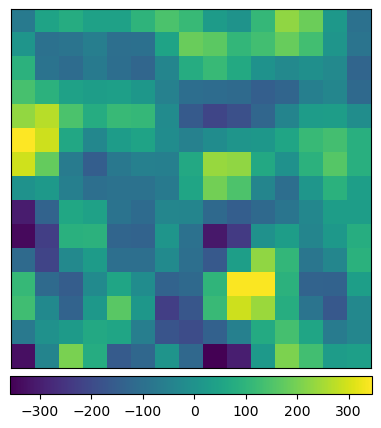

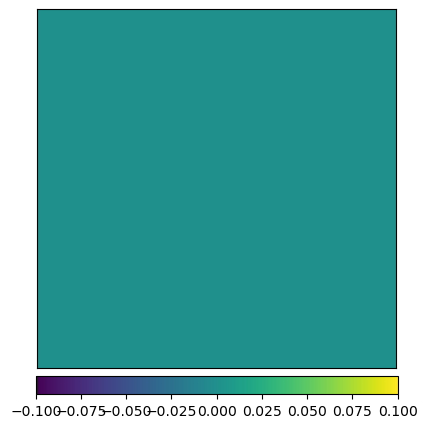

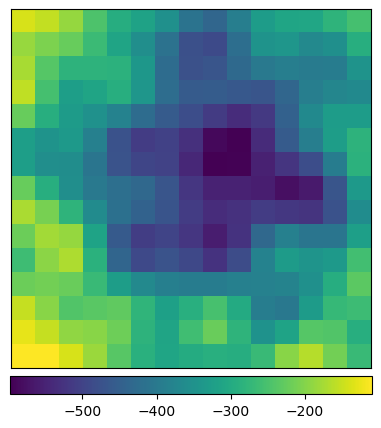

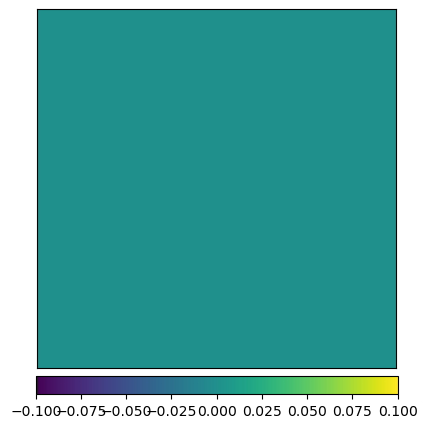

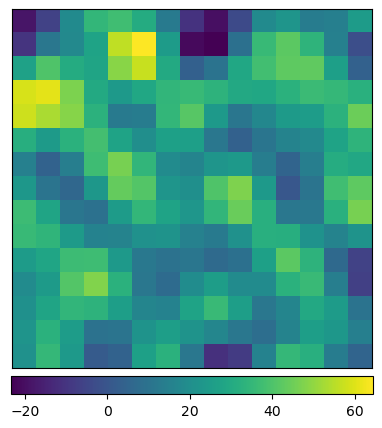

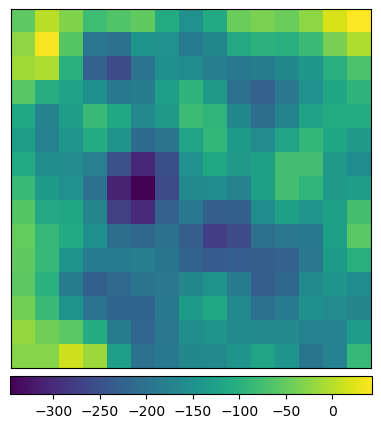

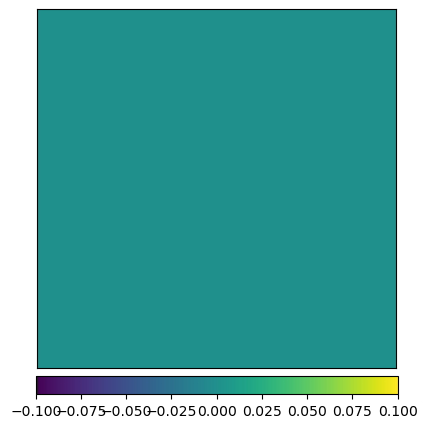

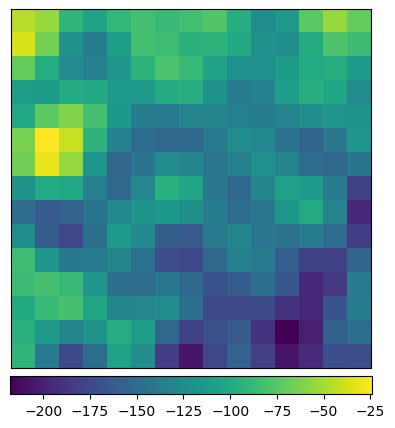

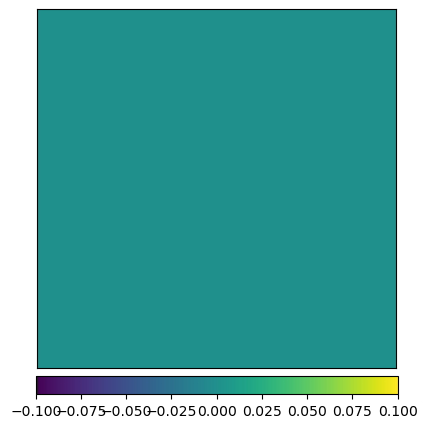

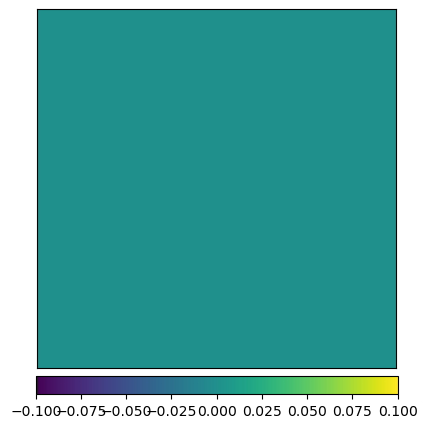

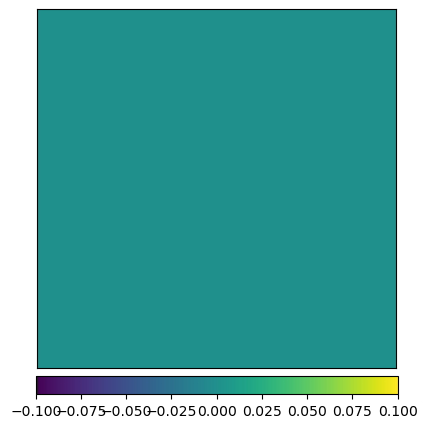

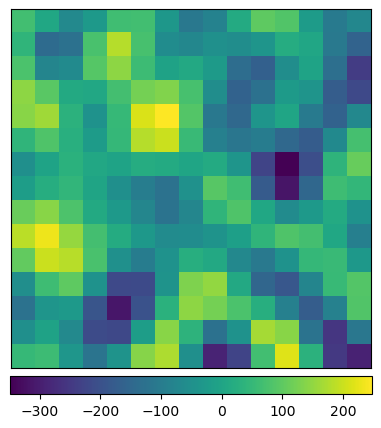

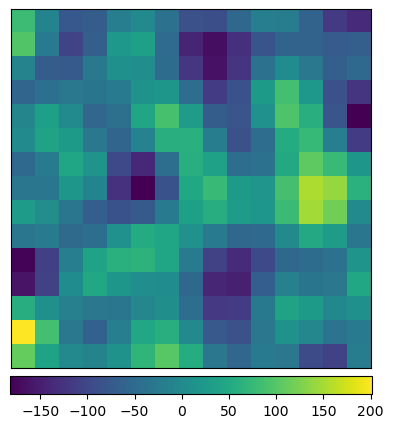

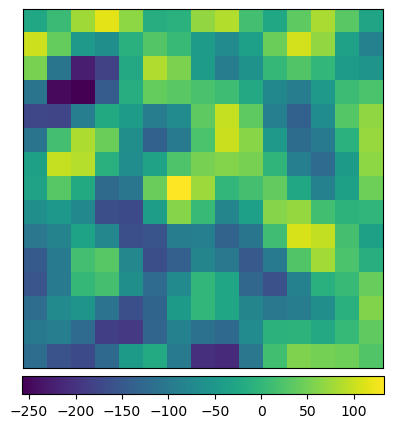

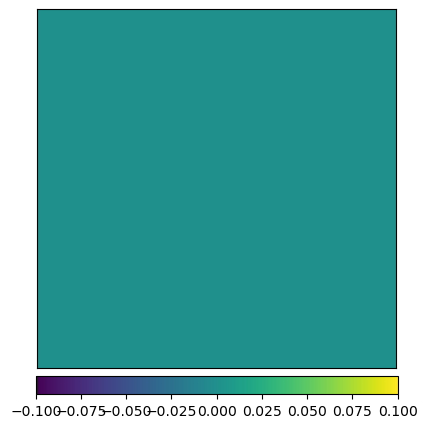

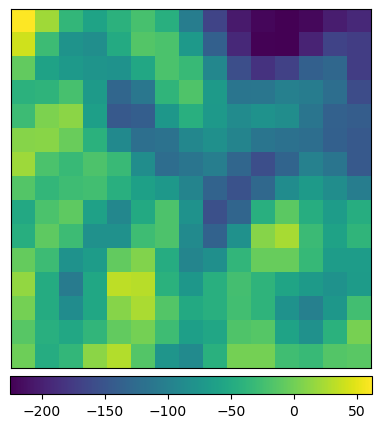

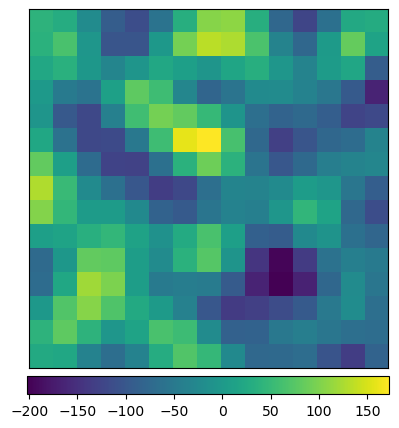

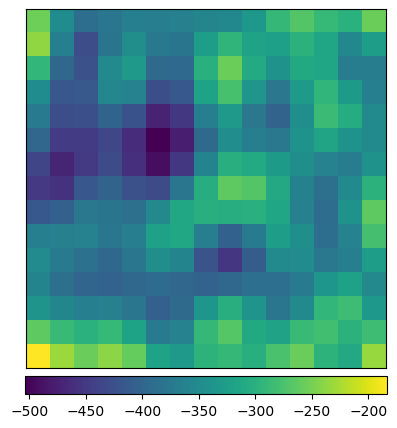

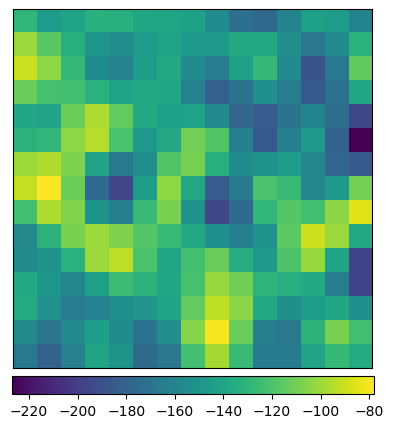

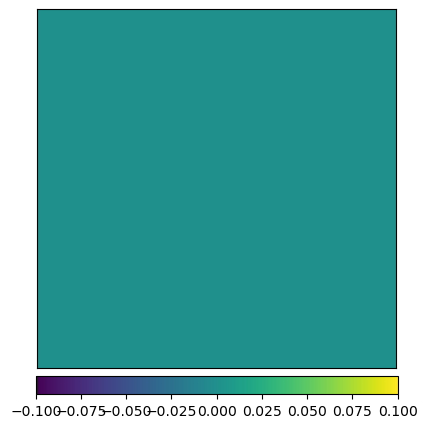

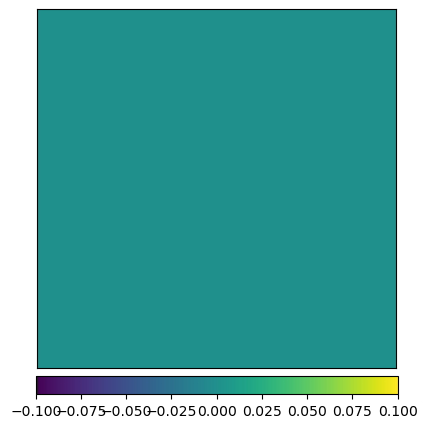

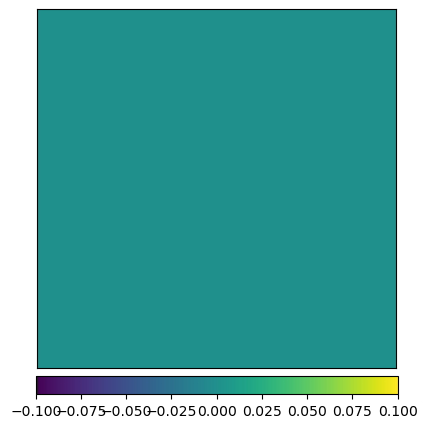

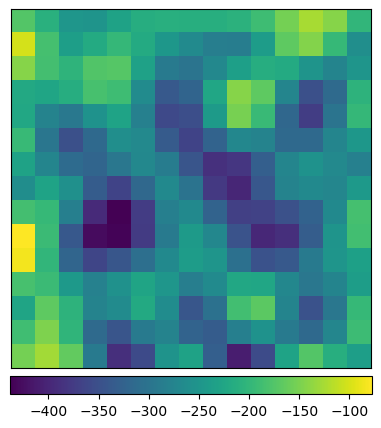

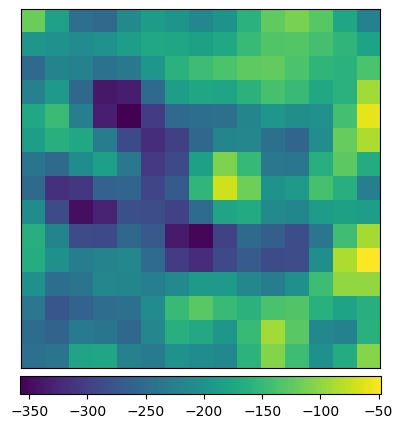

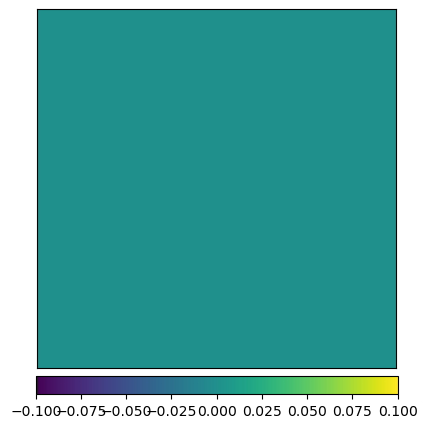

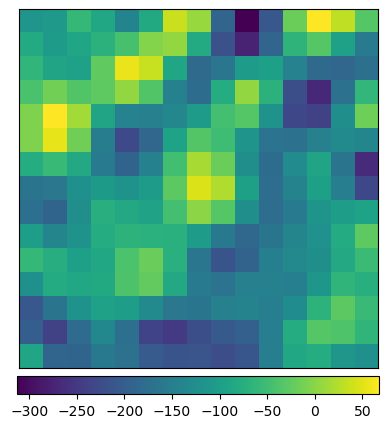

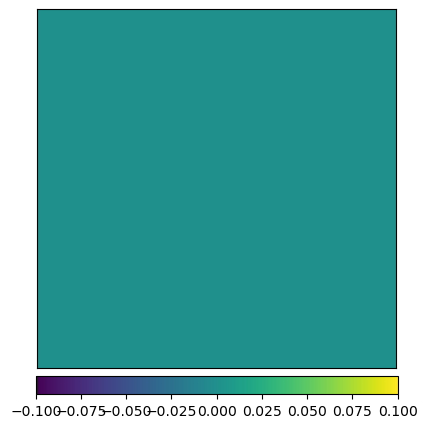

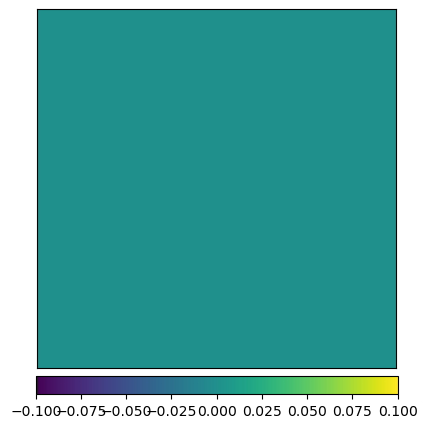

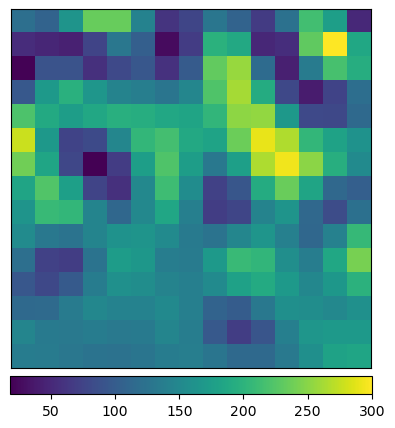

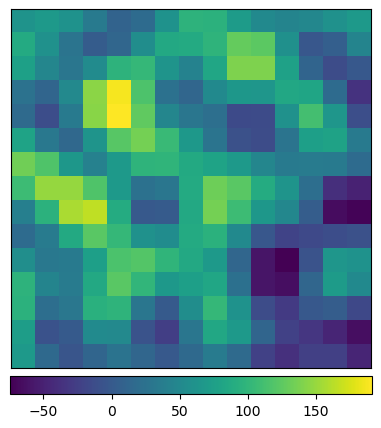

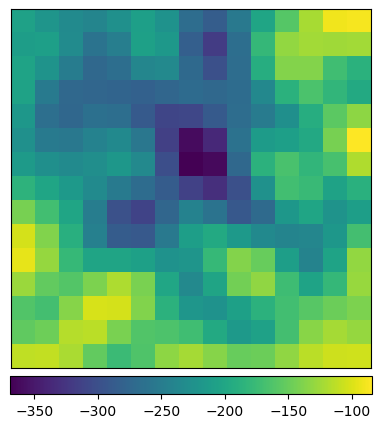

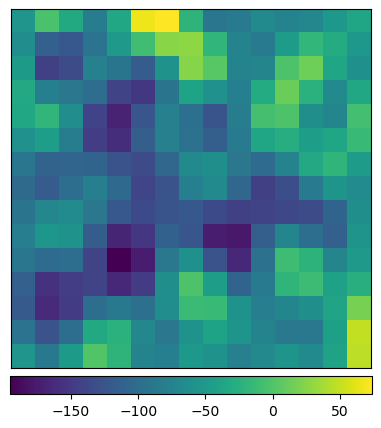

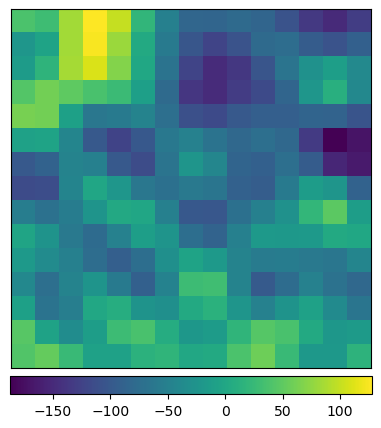

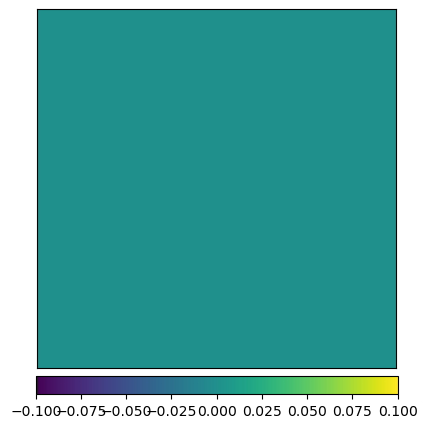

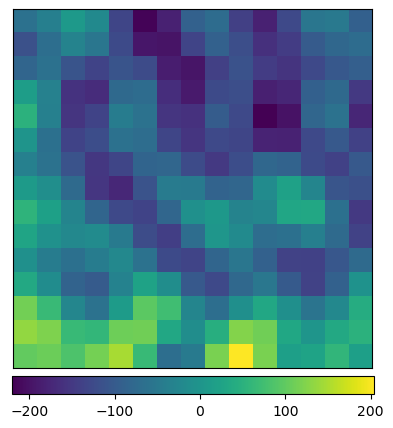

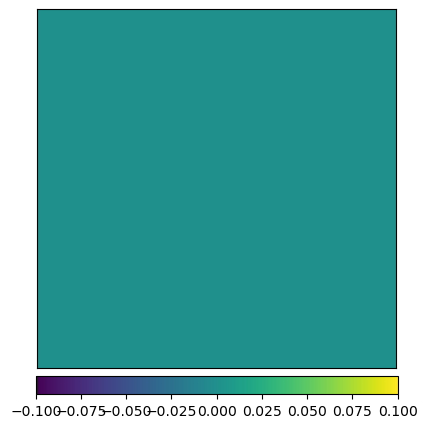

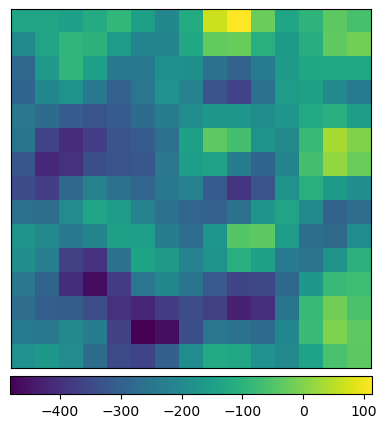

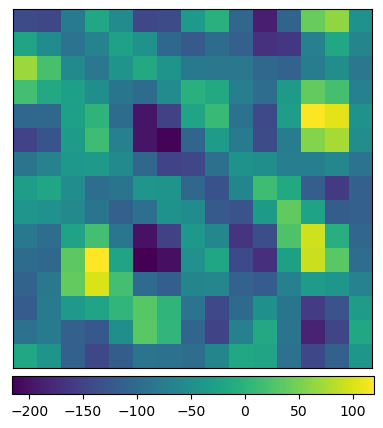

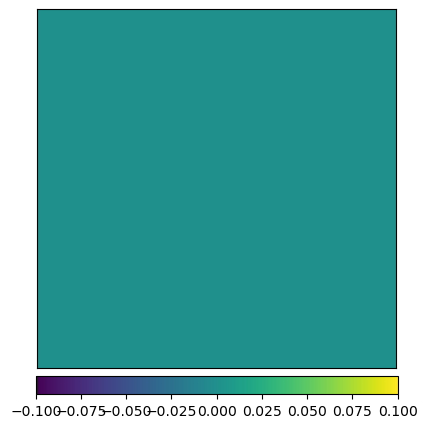

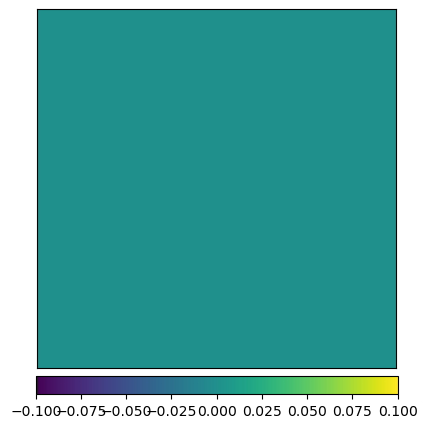

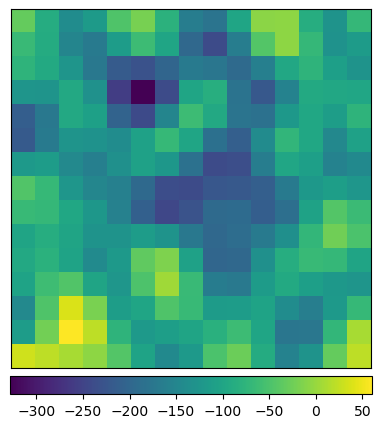

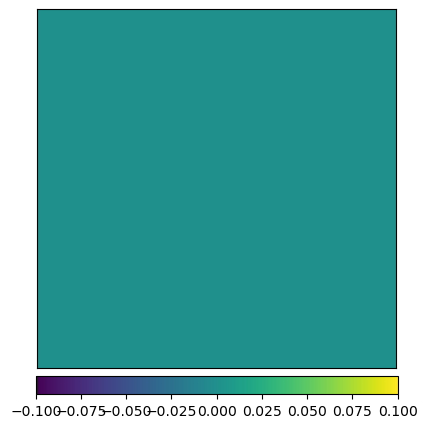

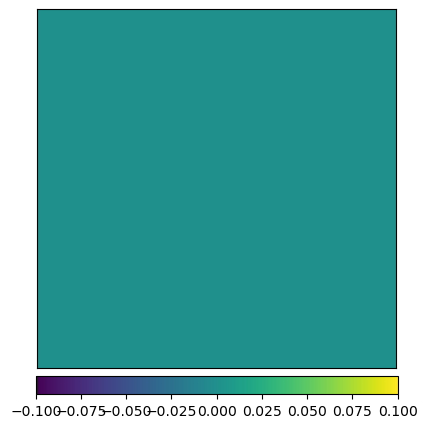

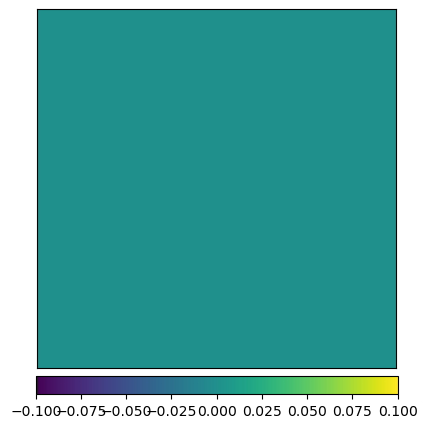

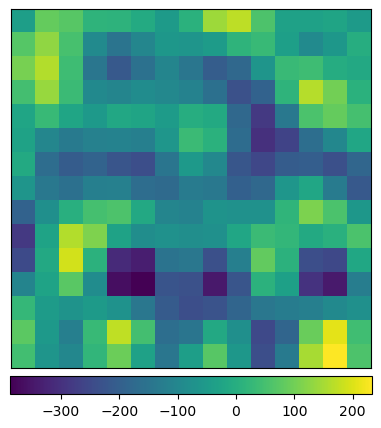

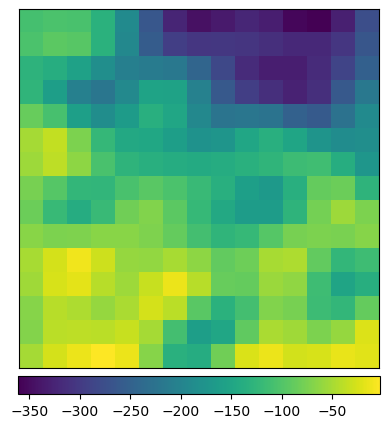

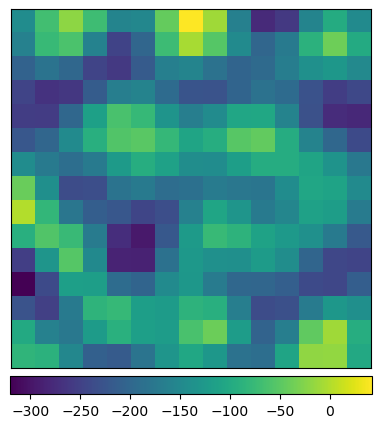

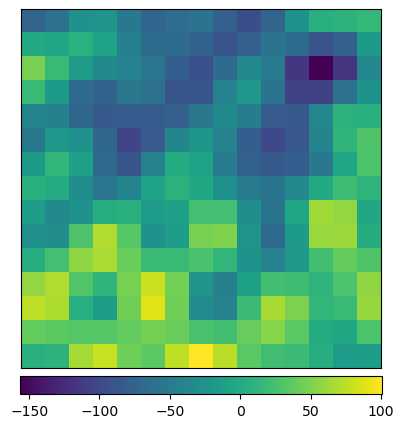

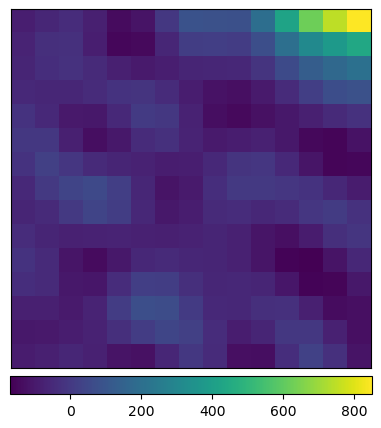

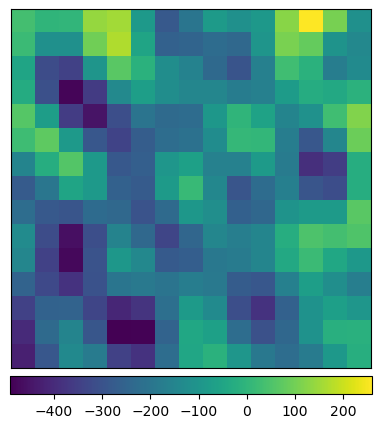

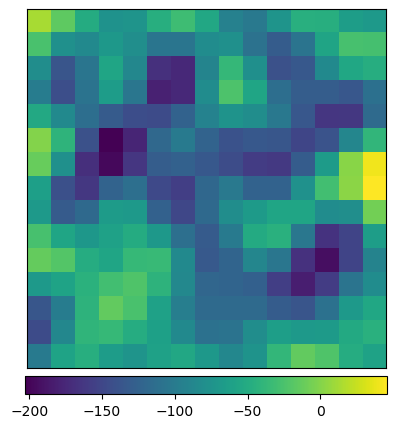

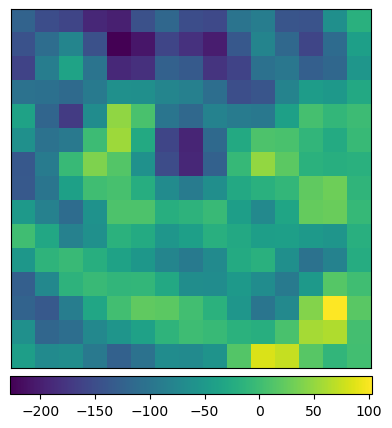

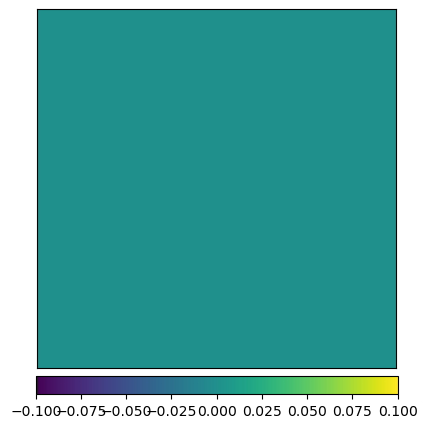

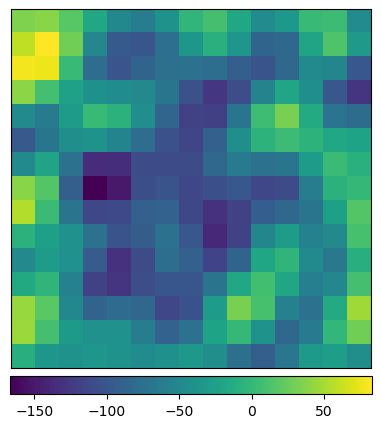

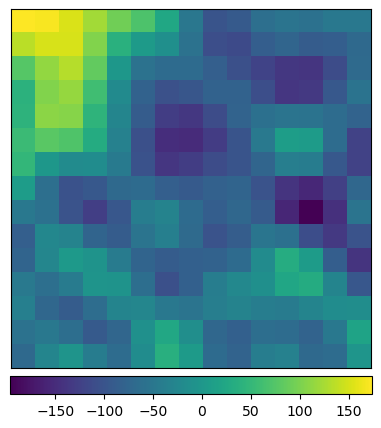

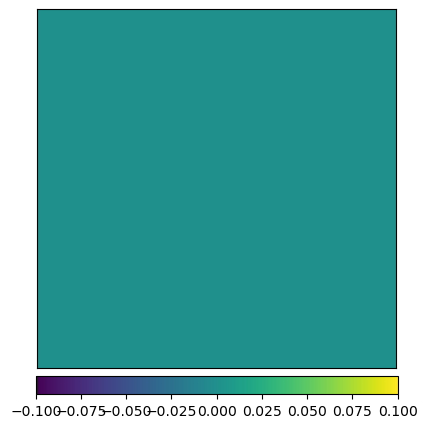

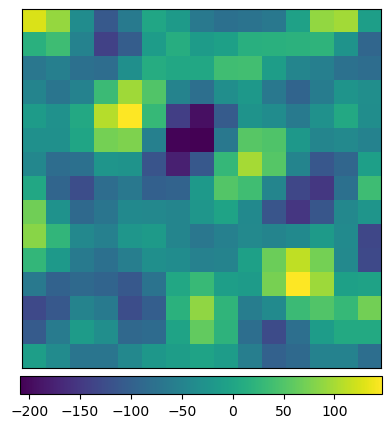

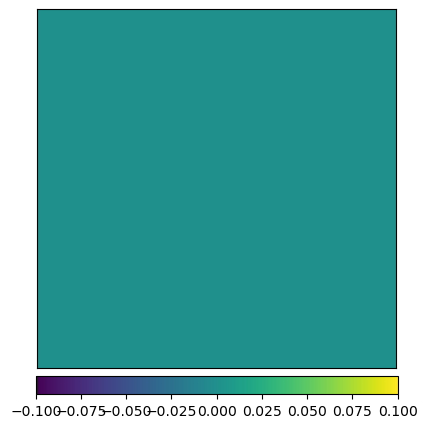

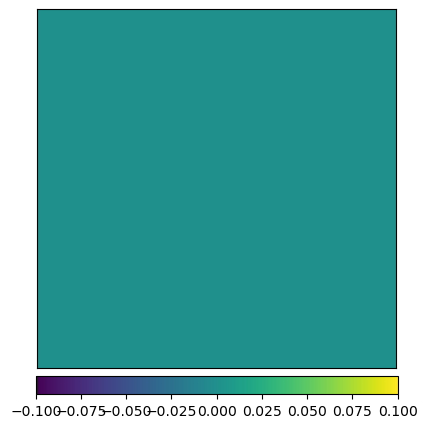

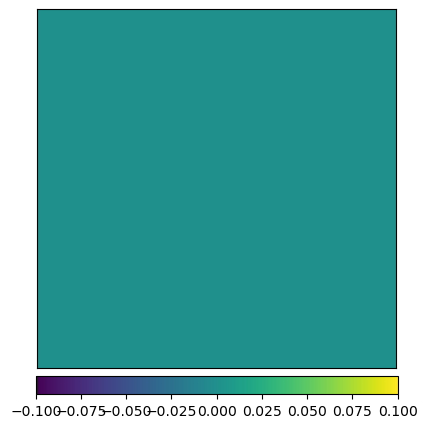

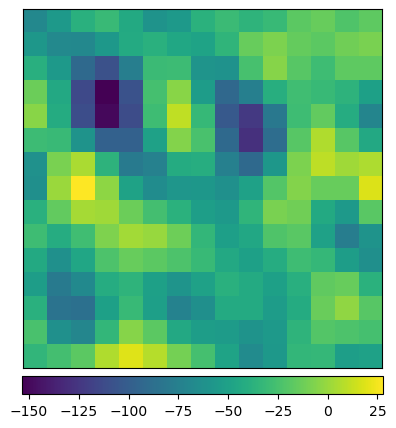

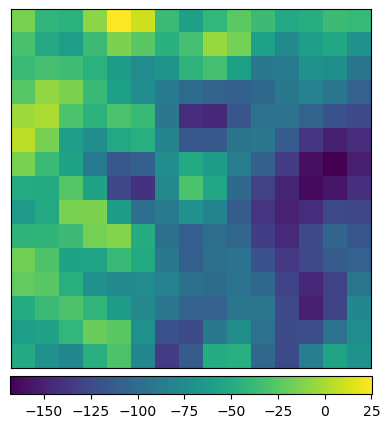

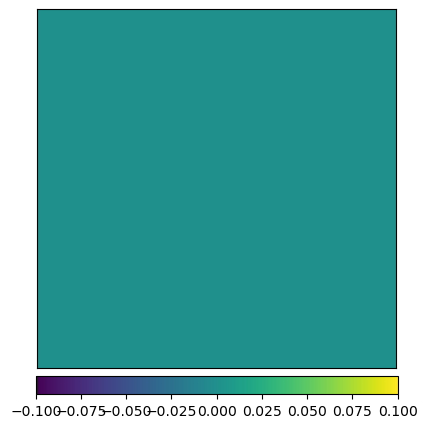

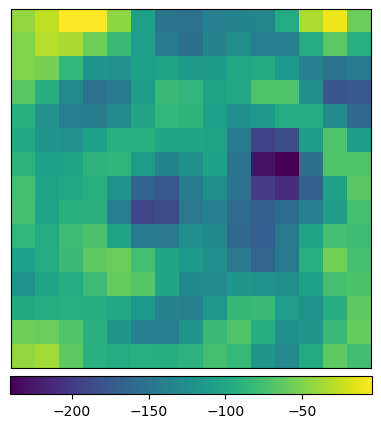

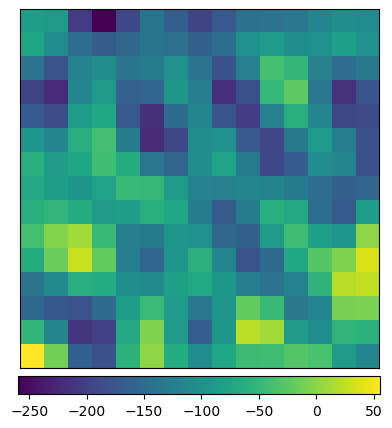

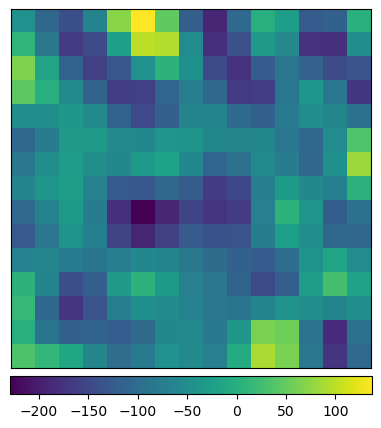

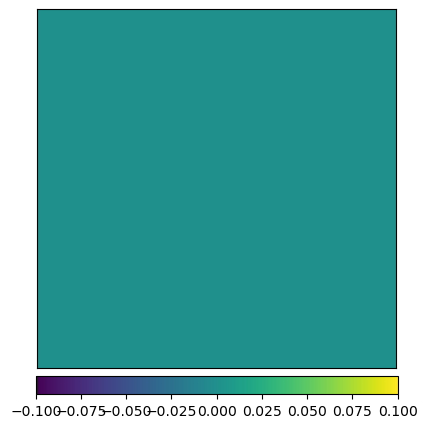

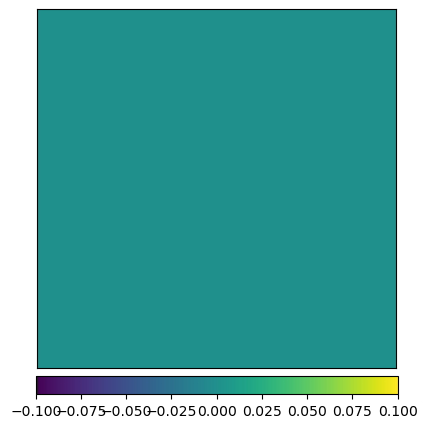

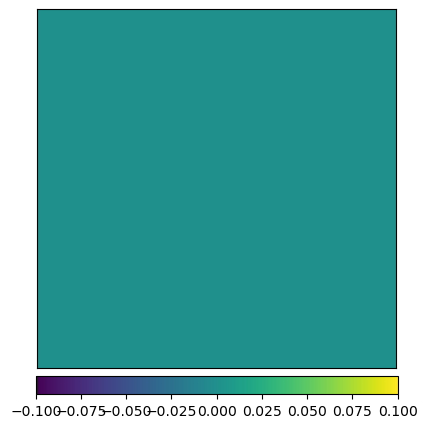

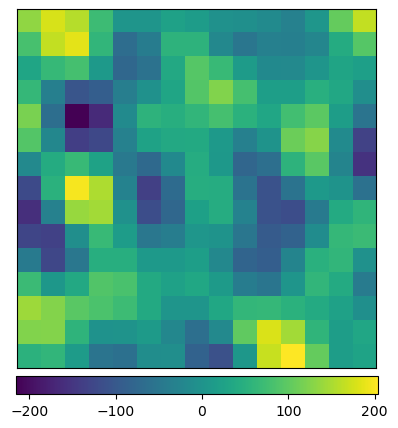

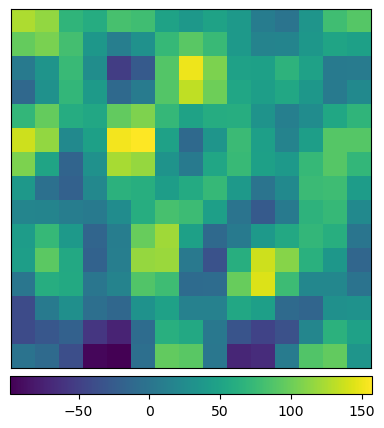

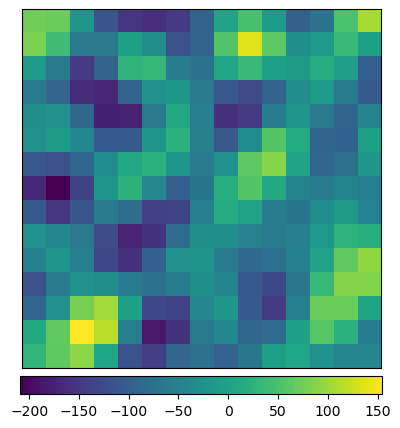

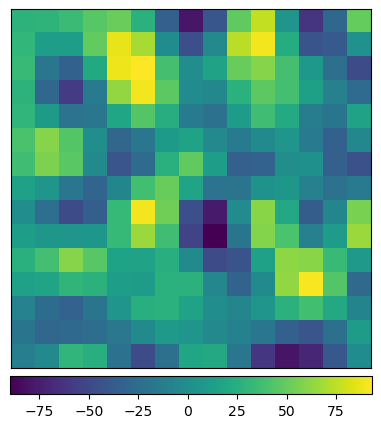

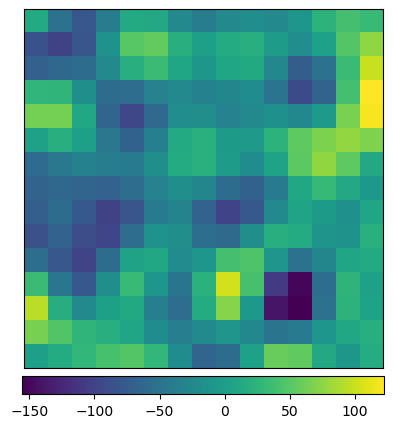

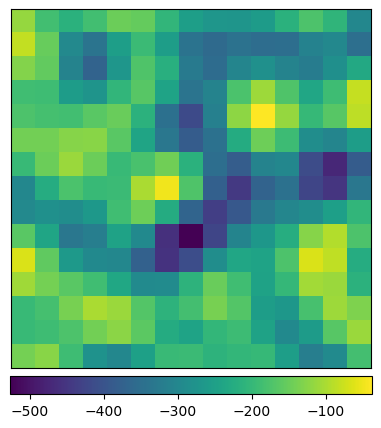

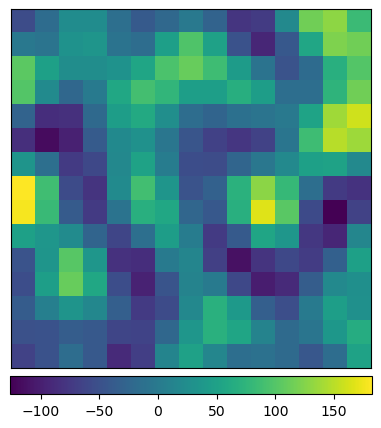

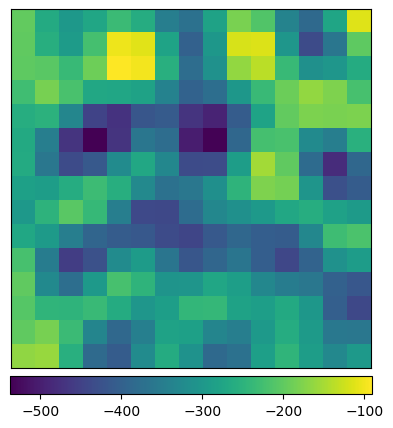

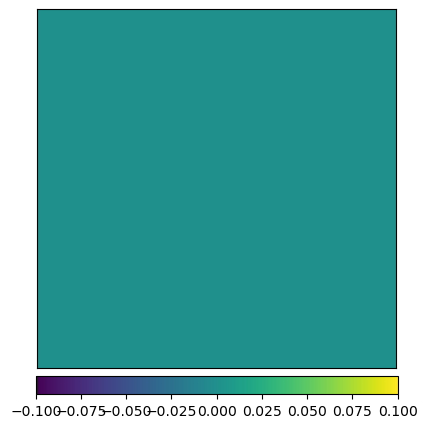

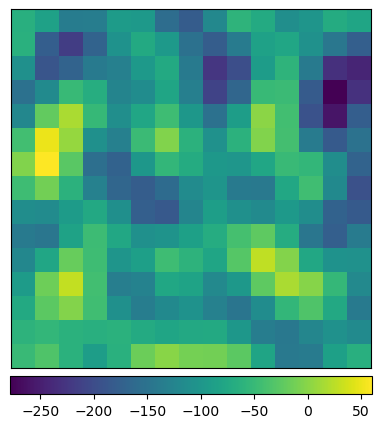

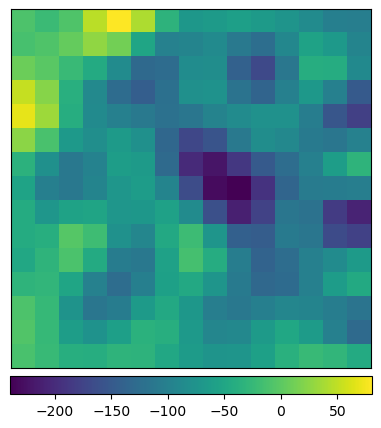

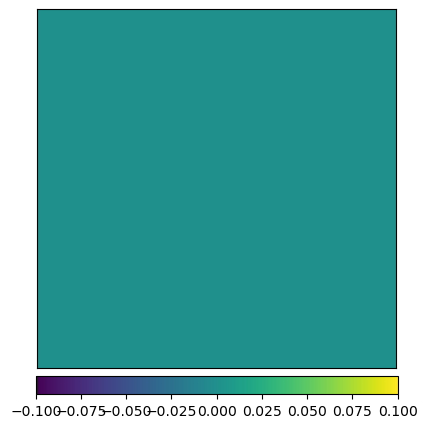

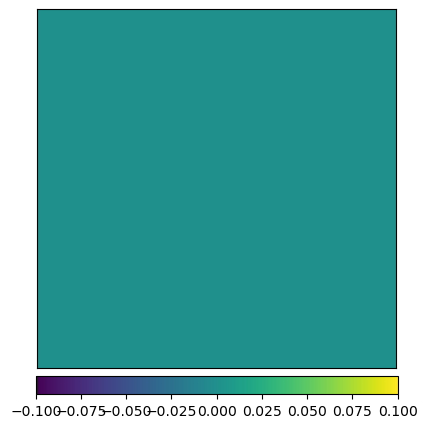

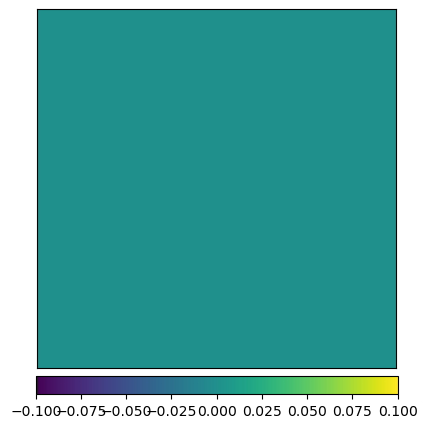

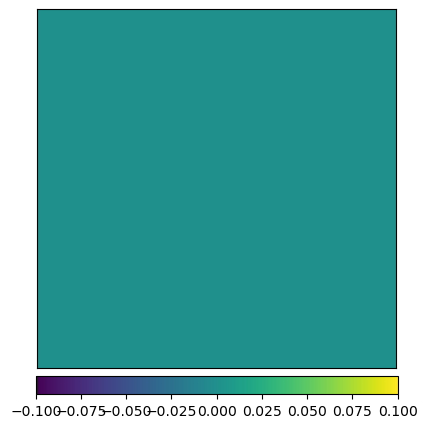

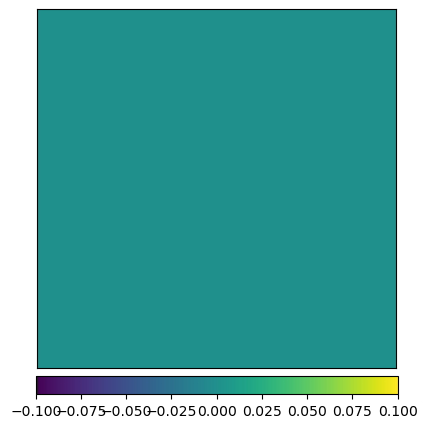

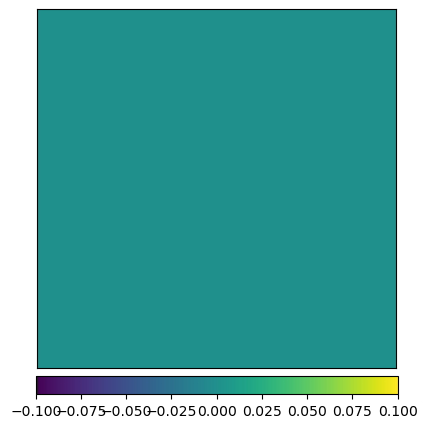

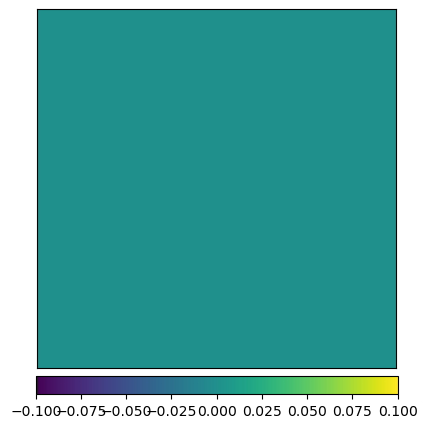

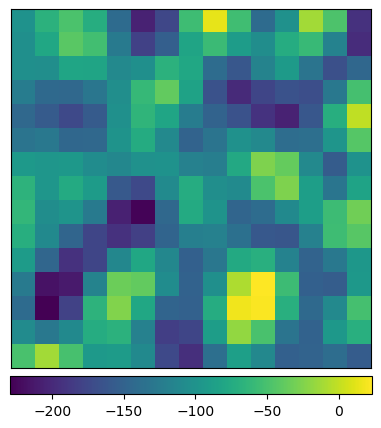

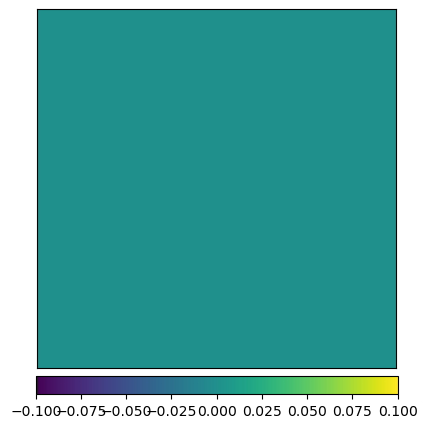

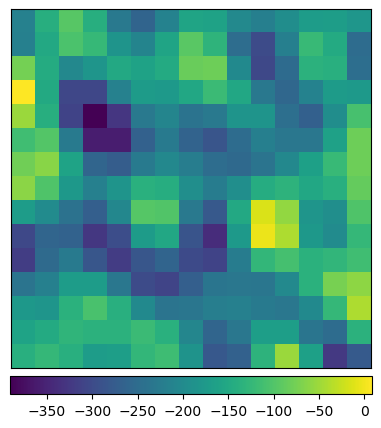

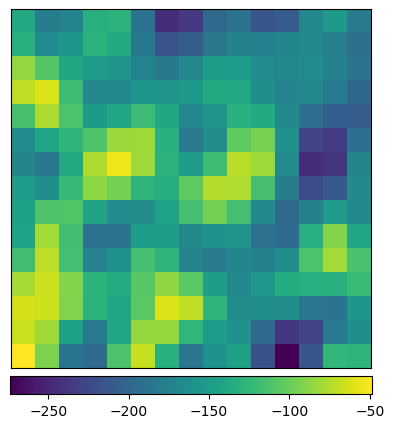

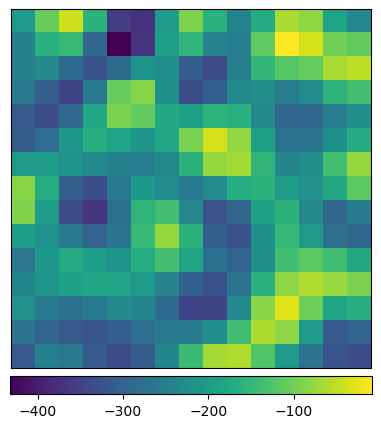

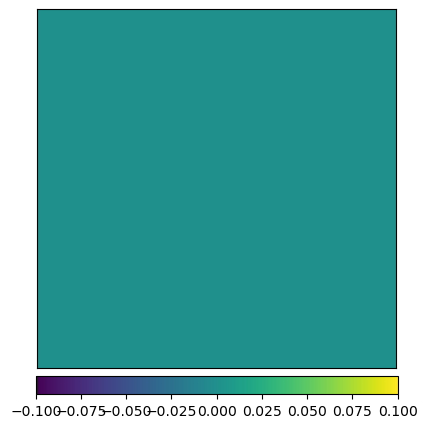

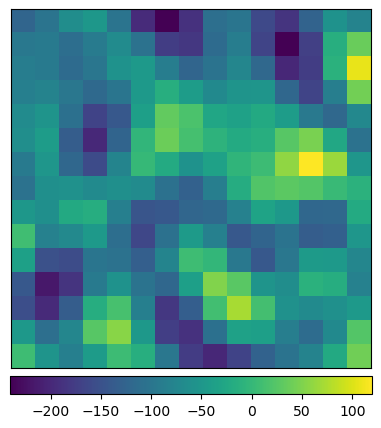

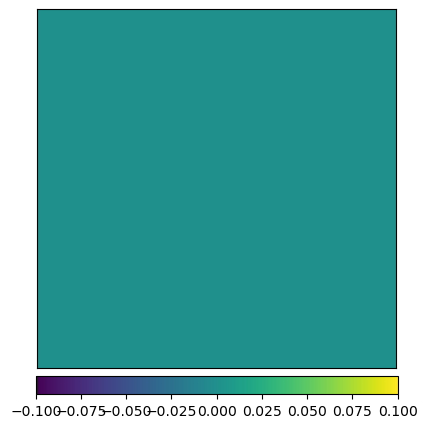

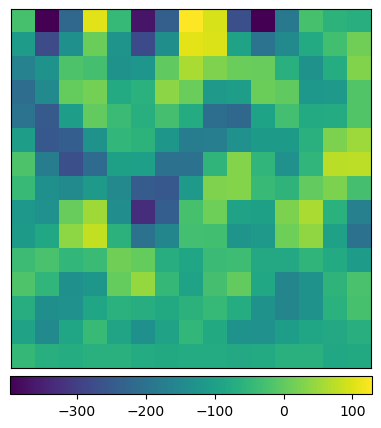

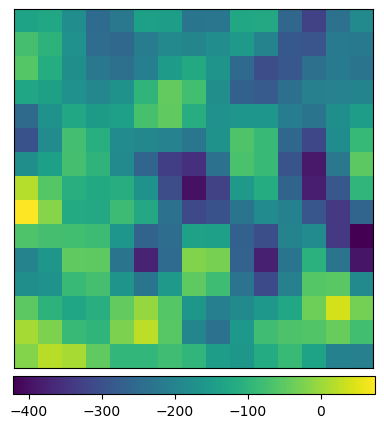

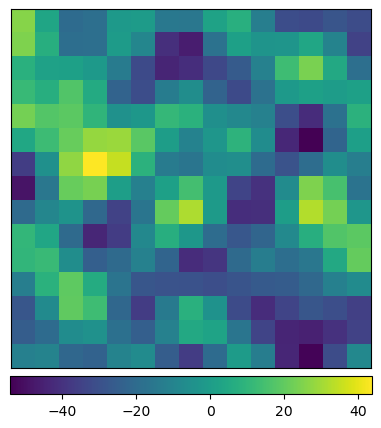

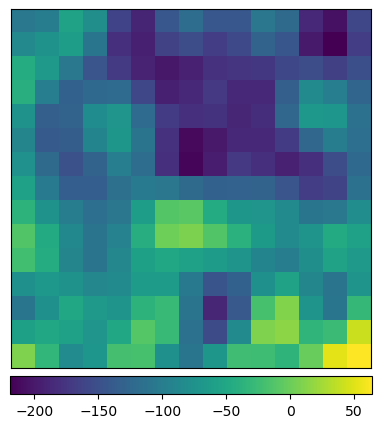

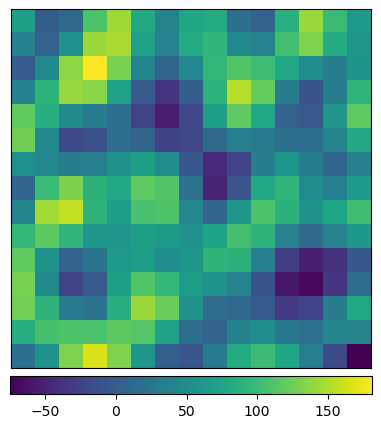

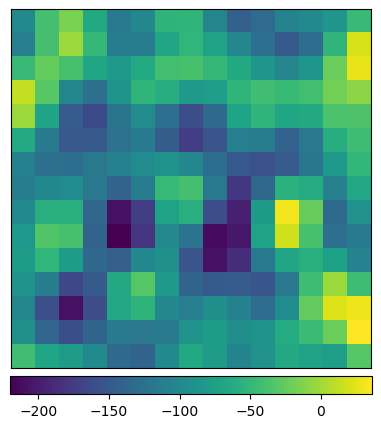

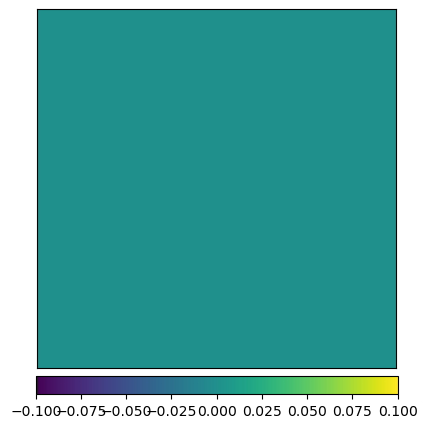

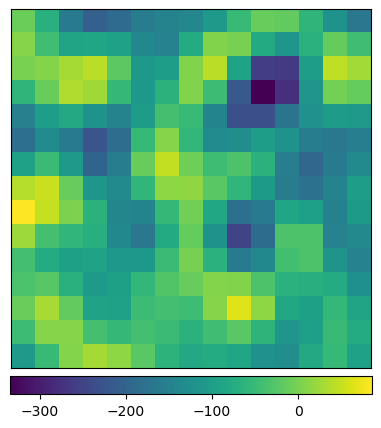

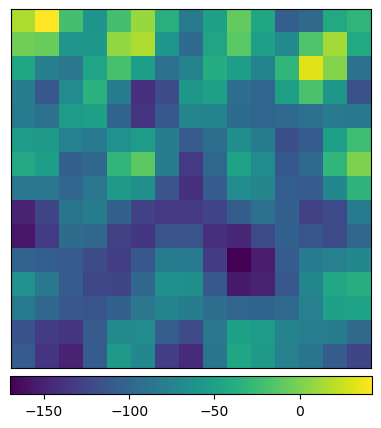

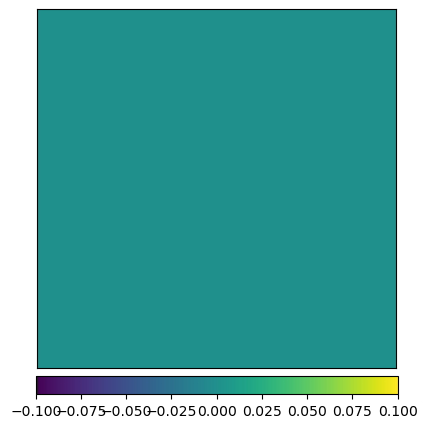

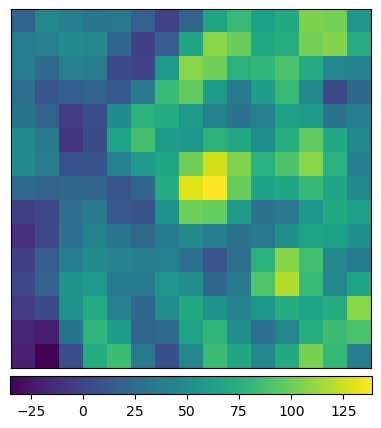

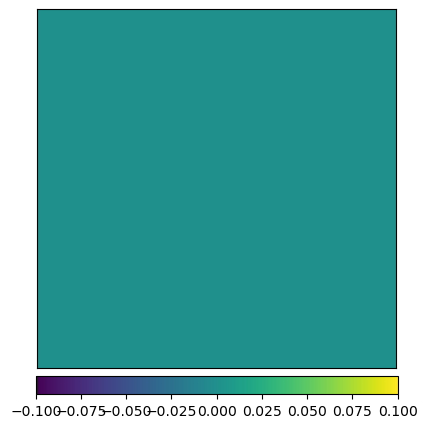

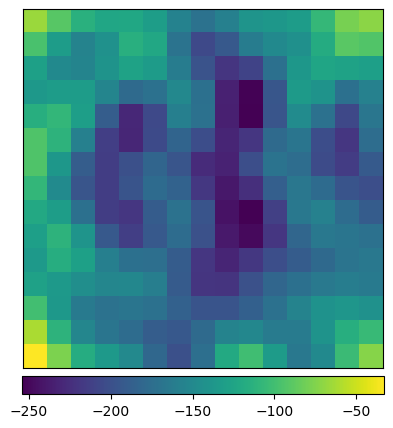

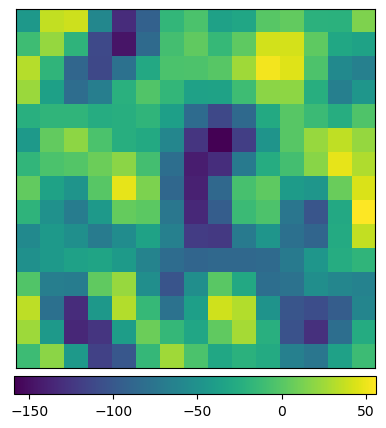

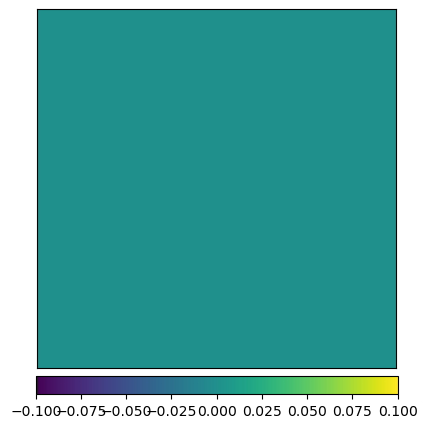

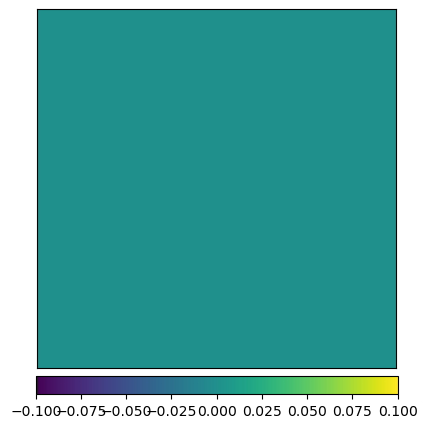

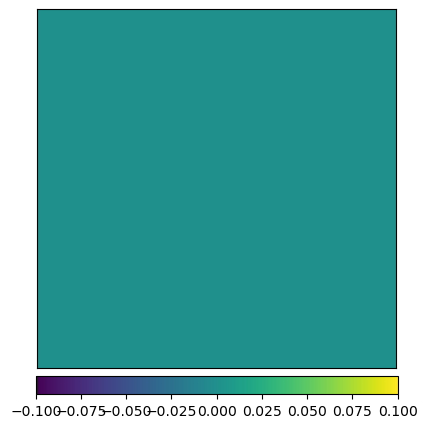

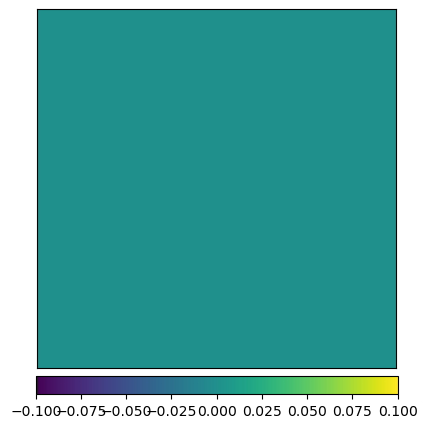

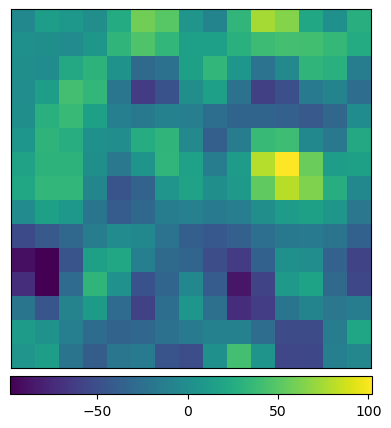

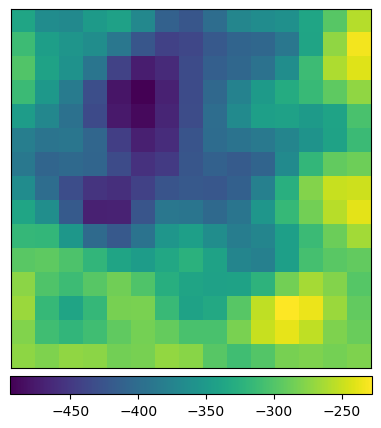

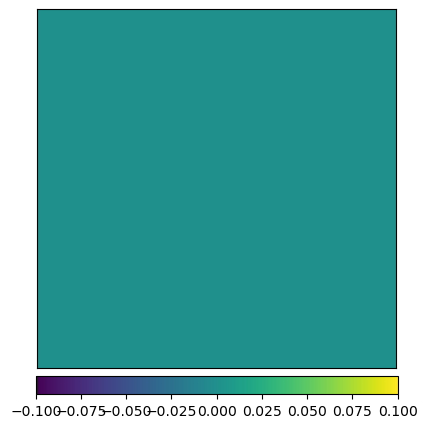

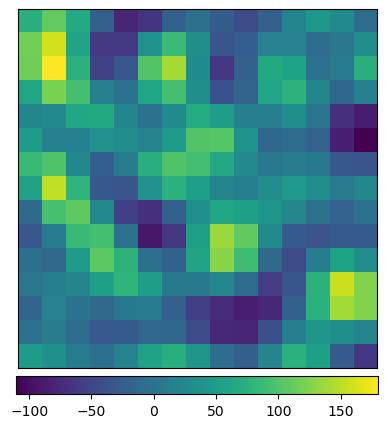

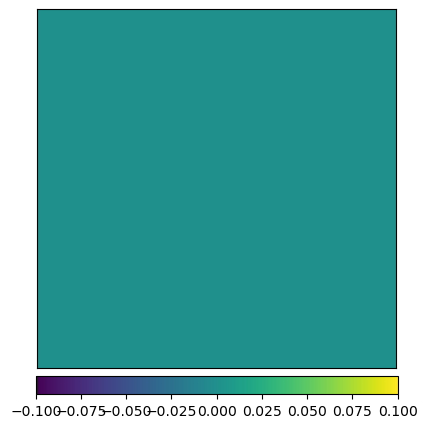

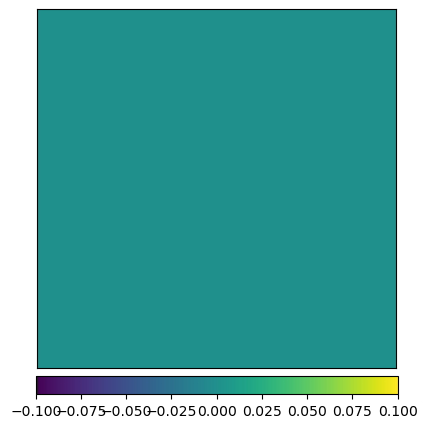

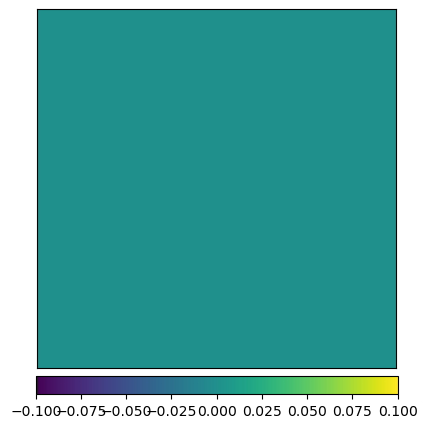

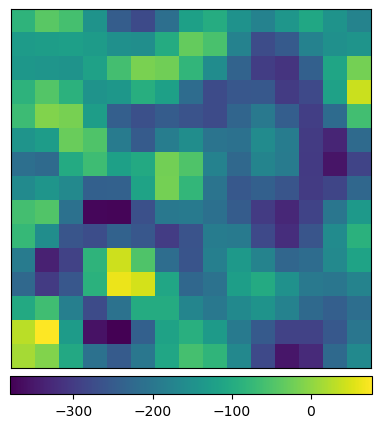

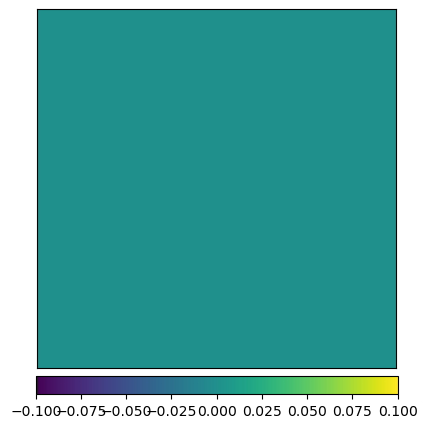

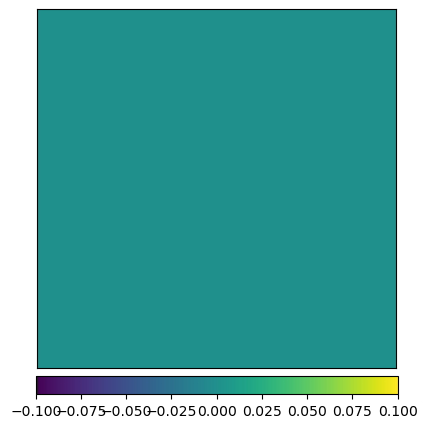

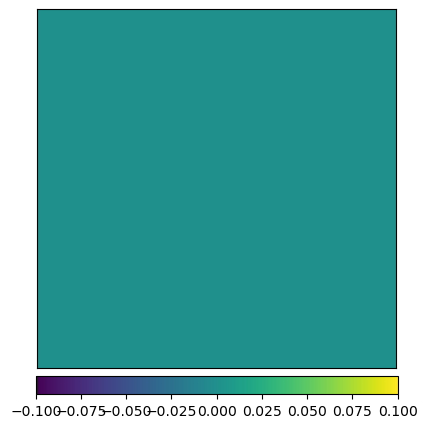

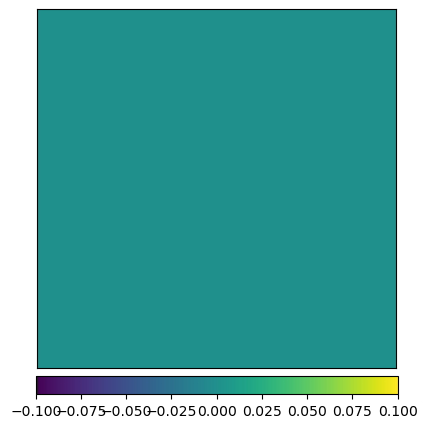

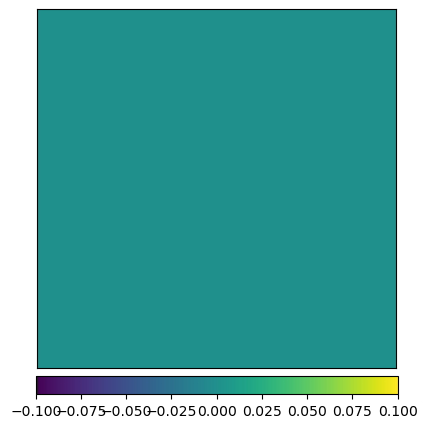

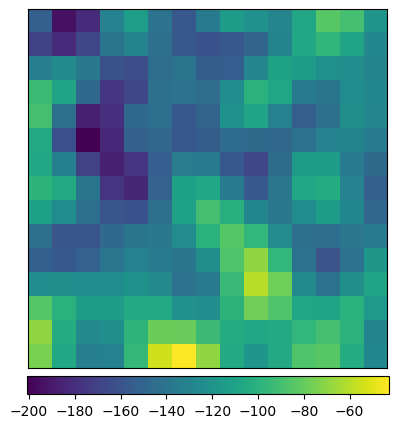

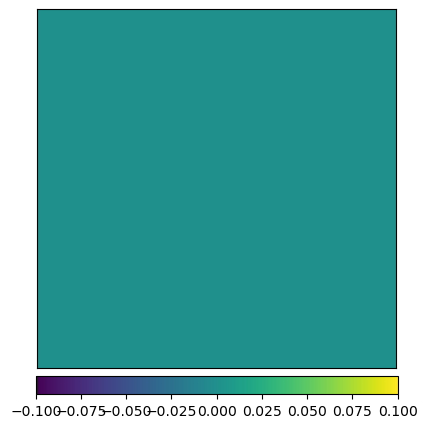

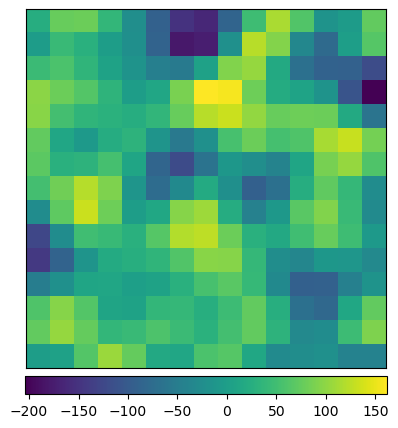

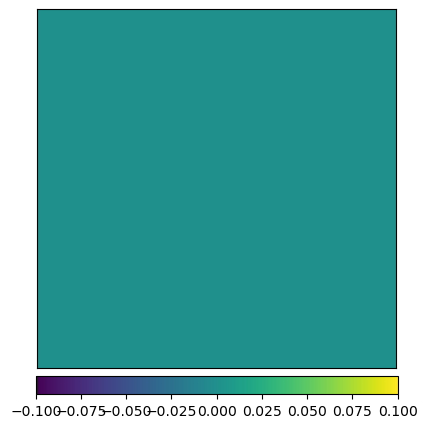

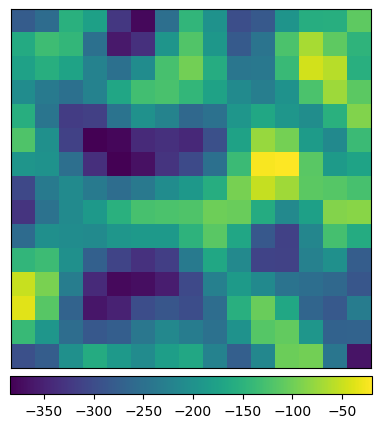

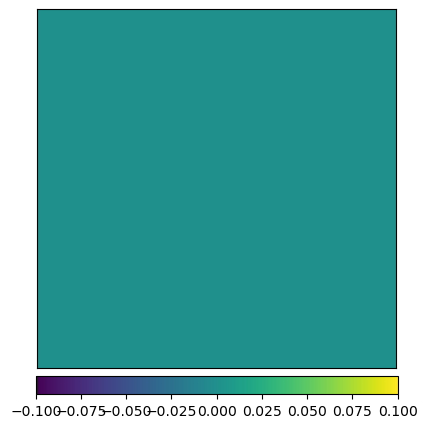

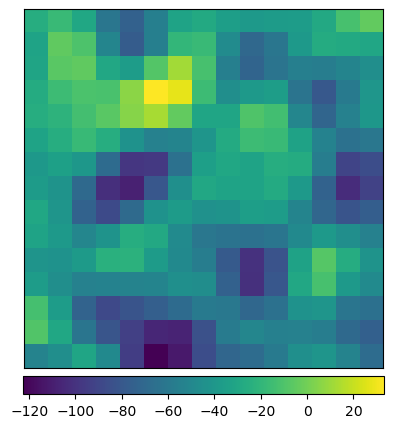

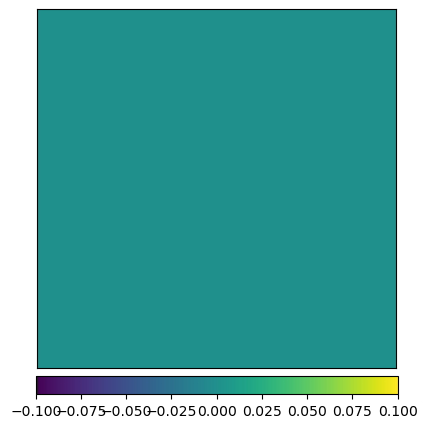

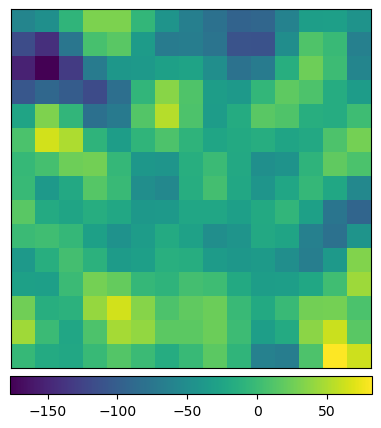

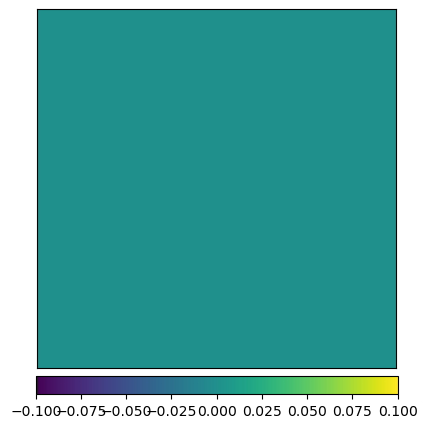

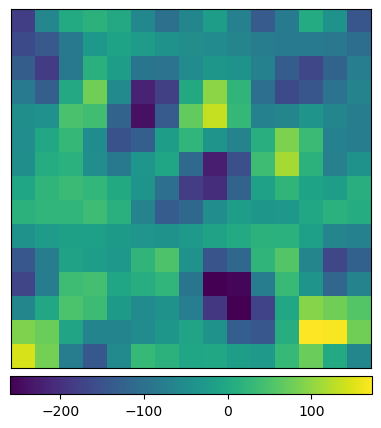

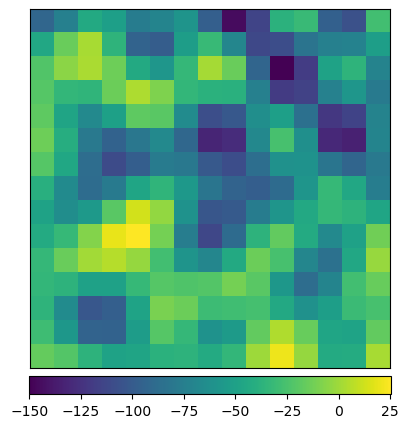

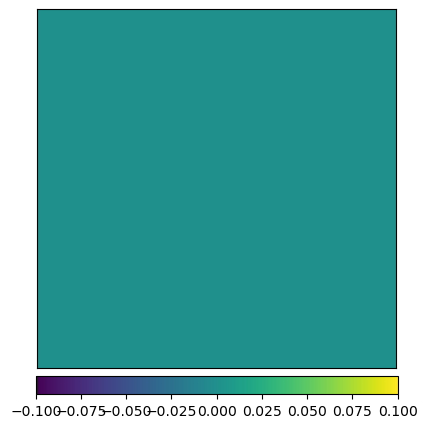

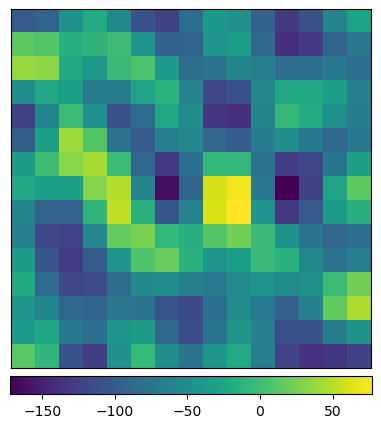

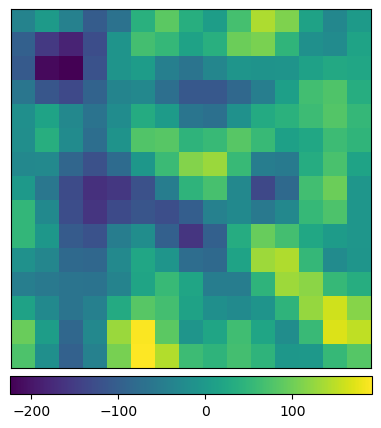

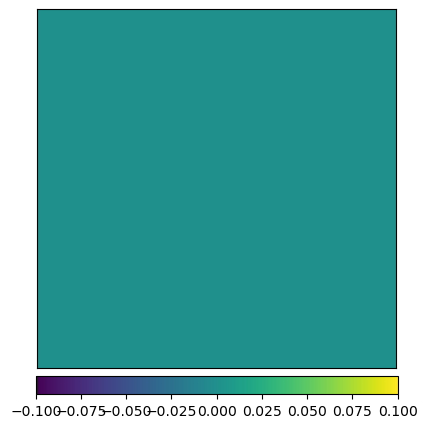

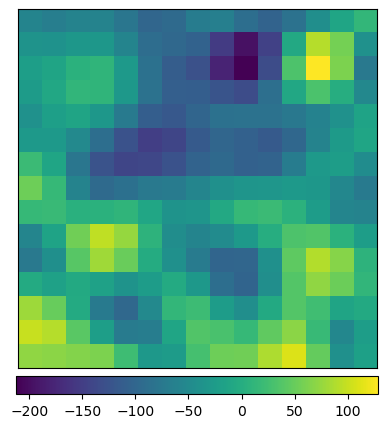

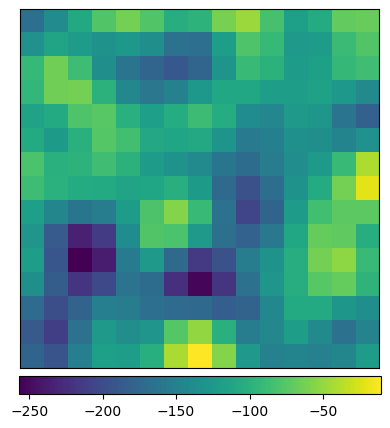

KeyboardInterrupt: 

In [5]:
# font_path = "data/cmunrm.ttf"
# font_manager.fontManager.addfont(font_path)
# prop = font_manager.FontProperties(fname = font_path)
# plt.rcParams["font.family"] = "sans-serif"
# plt.rcParams["font.sans-serif"] = prop.get_name()
# plt.rcParams["axes.unicode_minus"] = False

# 1. Different Training Sets
# 2. Viewing (next to each other)
# 3. Jiggling
# 4. Validation of catalogues

for i in range(len(awd.amf_ra.values)):
    dec = awd.amf_dec.values[i]
    ra = awd.amf_ra.values[i]
    
    # extract a set of thumbnail images centered on each set ofcoordinates 
    # (1 per for loop, in this case)
    stamp = reproject.thumbnails(map_pix, coords = np.deg2rad([dec, ra]), r = windowlen*utils.arcmin)
    
    f, ax = plt.subplots(figsize = (5, 5))
    
    # Display image as 2D raster (Matplotlib)
    f1 = ax.imshow(stamp[0])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.colorbar(mappable = f1, ax = ax, orientation = "horizontal", fraction = 0.047, pad = 0.02)
    scalebar = AnchoredSizeBar(ax.transData,
                              4.4, "", "center left",
                              pad = 0,
                              sep = 7,
                              color = "white",
                              frameon = False,
                              size_vertical = 0.02)
#     ax.add_artist(scalebar)
#     ax.text(0.1, 0.4, 'R = 10$\,$\''.format(10), c= "white", fontsize = 18, transform = ax.transAxes)
    
#     ax.text(0.2, 0.7, "N={}".format(lens[i]), color = "white", fontsize = 20)
    # ax.text(0.2, 7.8, "ROSAT".format(lens[i]), color = "white", fontsize = 20)
    # plt.savefig("output/stackros.png")
    
    plt.show()
    
    

In [ ]:
# 

In [9]:
# Categories
# 0 - AMF
# 1 - Zou subset DES
# 2 - Zou subset DESI
# 3 - Zou subset HSC
# 4 - WH22

## Some Samples ##

In [16]:
awd = pd.read_csv("data/union3.csv", skiprows= 0)
awd

,amf_ra,amf_dec,z,rh,cat
0,23.91280,20.74650,0.0601,219.3663,0
1,260.63240,32.13980,0.2252,200.7117,0
2,197.87960,-1.33560,0.2042,192.0829,0
3,250.14850,46.69170,0.2248,182.3373,0
4,346.34020,21.03780,0.1453,182.2769,0
...,...,...,...,...,...
854057,359.98911,-6.40920,1.0678,68.5000,4
854058,359.99091,-44.66209,0.7684,16.3400,4
854059,359.99377,-49.09889,0.6708,21.8500,4
854060,359.99503,-37.71075,0.6743,45.1500,4


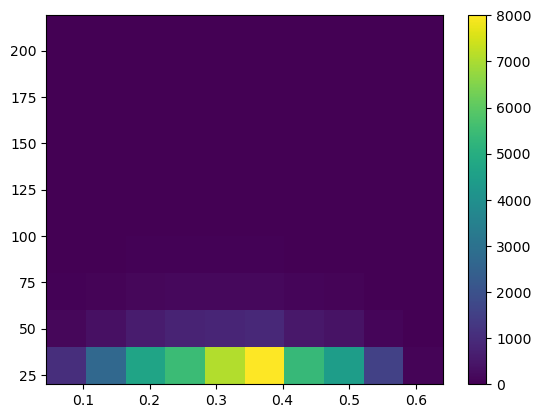

In [14]:
# Catalogue 0 - AMF

awd0 = awd[awd["cat"] == 0]
fig = plt.hist2d(awd0["z"], awd0["rh"])
plt.colorbar()
plt.show()

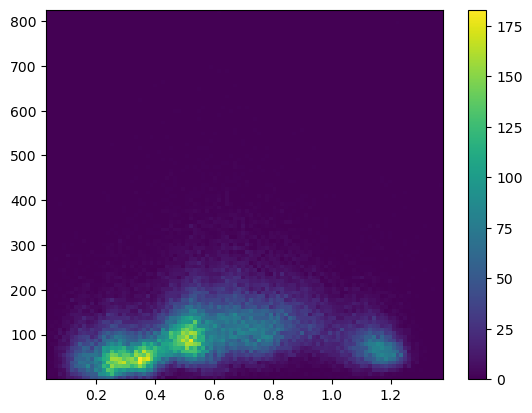

In [5]:
# Catalogue 1 - Zou DES

awd1 = awd[awd["cat"] == 1]
fig = plt.hist2d(awd1["z"], awd1["rh"], bins = (100,100))
plt.colorbar()
plt.show()

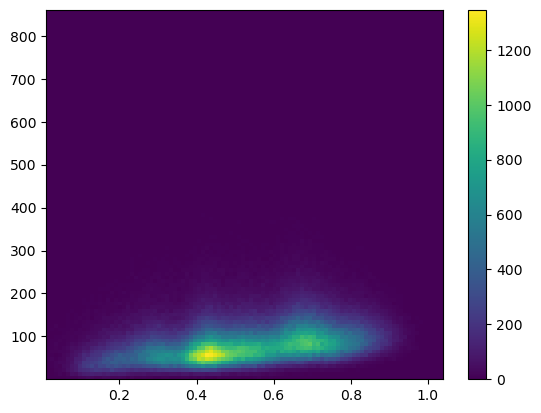

In [6]:
# Catalogue 2 - Zou DESI

awd2 = awd[awd["cat"] == 2]
fig = plt.hist2d(awd2["z"], awd2["rh"], bins = (100, 100))
plt.colorbar()
plt.show()

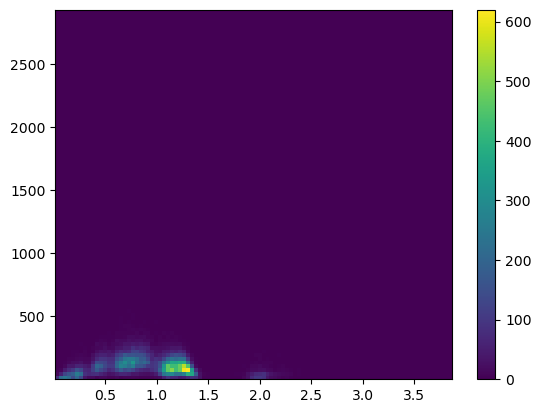

In [7]:
# Catalogue 3 - Zou HSC

awd3 = awd[awd["cat"] == 3]
fig = plt.hist2d(awd3["z"], awd3["rh"], bins = (100,100))
plt.colorbar()
plt.show()

In [ ]:
# Restrict richness to 1.5

# Richness is NOT the same thing across catalogues

# Title
# Integrated signal abov

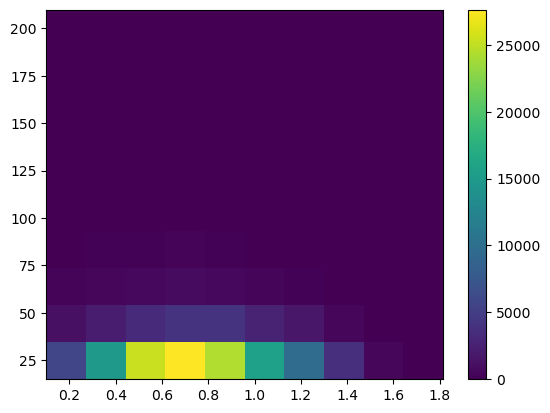

In [18]:
# Catalogue 4 - WH22

awd4 = awd[awd["cat"] == 4]
fig = plt.hist2d(awd4["z"], awd4["rh"])
plt.colorbar()
plt.show()

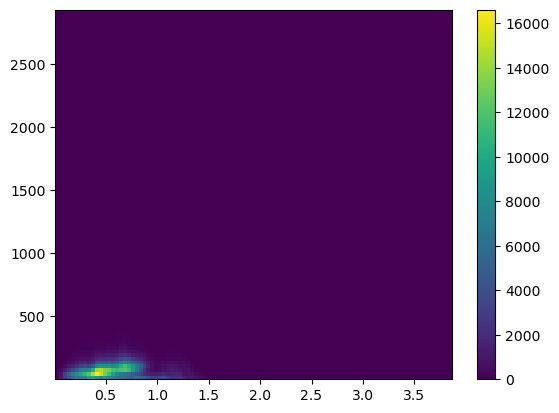

In [20]:
# All Catalogues

fig = plt.hist2d(awd["z"], awd["rh"], bins = (100,100))
plt.colorbar()
plt.show()

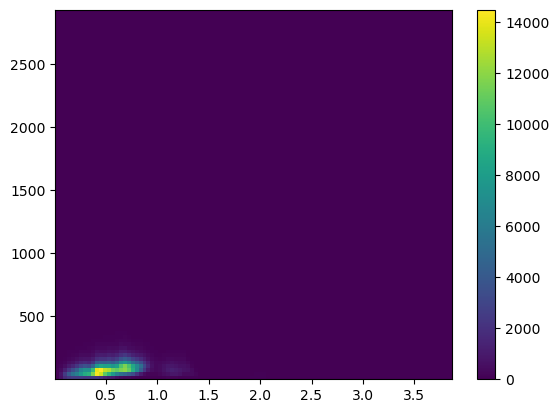

In [25]:
# Zou Catalogues only (1,2,3)

awd_Zou = awd[(awd["cat"] == 1) | (awd["cat"] == 2) | (awd["cat"] == 3)]
fig = plt.hist2d(awd_Zou["z"], awd_Zou["rh"], bins = (100,100))
plt.colorbar()
plt.show()

## Trying to Manually Find Cumulative Distribution Function - WH22

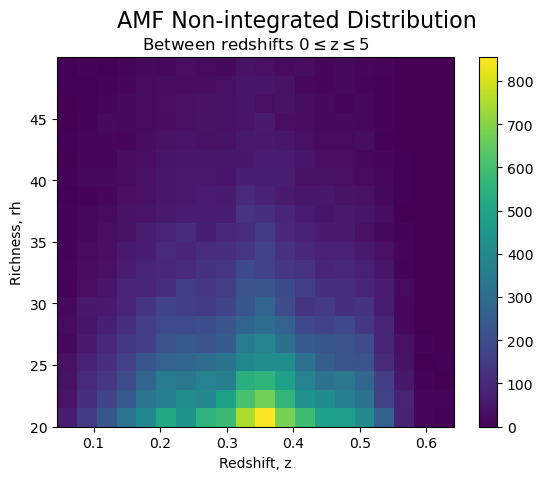

In [5]:
catalogue = 0
z_lb = 0
z_hb = 5
rh_lb = 0
rh_hb = 50
bin_num = 20

cat_names = ["AMF", "Zou DES", "Zou DESI", "Zou HSC", "WH22"]

awd_cat = awd[(awd["cat"] == catalogue) & (awd["z"] >= z_lb) & (awd["z"] <= z_hb) 
               & (awd["rh"] >= rh_lb) & (awd["rh"] <= rh_hb)]
plt.hist2d(awd_cat["z"], awd_cat["rh"], bins = (bin_num, bin_num))
plt.title("Between redshifts " + str(z_lb) + "$\leq$z$\leq$" + str(z_hb), fontsize = 12)
plt.xlabel("Redshift, z")
plt.ylabel("Richness, rh")

plt.suptitle(cat_names[catalogue] + " Non-integrated Distribution", fontsize = 16)
plt.colorbar()
plt.show()

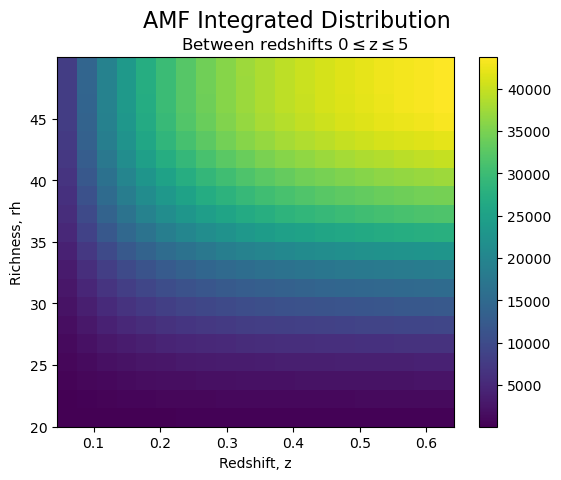

In [6]:
# Understanding the "Integrated" code:

# Histdata is an array storing the histogram value (color) at each coordinate.
# xbins and ybins keep track of the bin edges along the axes
# mesh is irrelevant here
# Change number of bins here

hist_data, xbins, ybins, mesh = plt.hist2d(awd_cat["z"], awd_cat["rh"], bins = (bin_num, bin_num))

# Integrate this histogram data. 
# Pandas cumsum (different from np cumsum - look it up) over the data. axis = 0 is adding each row to the next one.
hist_data = hist_data.cumsum(axis = 0).cumsum(axis = 1)

# Matplotlib pcolormesh is used to plot a color map
plt.pcolormesh(xbins, ybins, hist_data)
plt.suptitle(cat_names[catalogue] + " Integrated Distribution", fontsize = 16)
plt.title("Between redshifts " + str(z_lb) + "$\leq$z$\leq$" + str(z_hb), fontsize = 12, x = 0.6)
plt.xlabel("Redshift, z")
plt.ylabel("Richness, rh")
plt.colorbar()
plt.show()

In [20]:
# Lookup for objects in certain range:

catalogue = 3
z_lb = 1
z_hb = 5
rh_lb = 0
rh_hb = 500

awd_check = awd[(awd["cat"] == catalogue) & (awd["z"] >= z_lb) & (awd["z"] <= z_hb) 
               & (awd["rh"] >= rh_lb) & (awd["rh"] <= rh_hb)]

print("Size: " + str(len(awd_check)))

Size: 17903


In [ ]:
# Using to find for other catalogues:

# Insert here

# How to find intersections? It seems like the union3 file, etc. was
# made such that duplicates from one catalogue were dropped?? idk

## Failed Attempts

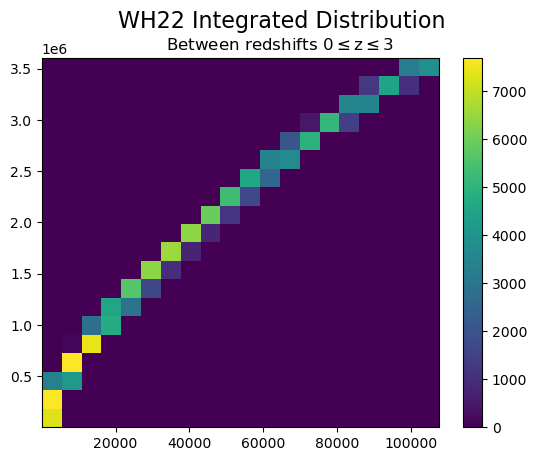

In [7]:
# Another Failed Attempt

# awd_WH22_int = awd_WH22.sort_values(by = "z")
# awd_WH22_int["z_cum"] = np.cumsum(awd_WH22_int["z"], axis = 0)
# awd_WH22_int["rh_cum"] = np.cumsum(awd_WH22_int["rh"], axis = 0)

# fig = plt.hist2d(awd_WH22_int["z_cum"], awd_WH22_int["rh_cum"], bins = (20,20))
# plt.suptitle("WH22 Integrated Distribution", fontsize = 16)
# plt.title("Between redshifts " + str(z_lb) + "$\leq$z$\leq$" + str(z_hb), fontsize = 12, x = 0.6)

# plt.colorbar()
# plt.show()